In [1]:
## Load required modules
import warnings, sys, os ## system
if not sys.warnoptions:
    warnings.simplefilter("ignore") # ignore warnings

import re
from glob import glob
from datetime import datetime    
import time
import copy
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from itertools import product, combinations
import multiprocessing as mp

from nilearn.maskers import NiftiMasker
#from bids import BIDSLayout, BIDSValidator
from nilearn import plotting, image

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()


# 1. Compare timecourses of neural and behavior at the EB and Updating 

## A. Load Behavior performance

In [2]:
base_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
ev_dir = '/mnt/c/Users/since/Desktop/Reall/'

In [3]:
#Behavior performance (Rater : Kikang) 
best_Run = [12,23] 
best_Nei = [16,13,32] 
best_Dre = [11,18,17,27] 
best_Bli = [13,8,11,17] 

good_RunningMan = [12,23,3,7,11,13,16,32,33] 
good_Neighbors = [16,13,32,17,21,22,23,27,28,30]
good_Dream = [11,17,18,27,12,16,23,33]
good_BlindDate = [13,8,11,17,5,18,22,28,30,32,33]

bad_RunningMan = [24, 10, 28, 25,14,5,27, 20, 8, 4, 29] 
bad_Neighbors = [5,6,7,11,12,15,19,2,8,25]
bad_Dream = [1,2,4,5,6,10,20,30,31,21,24,25]
bad_BlindDate = [3,4,6,7,12,14,15,19, 20, 27, 10, 21, 24]  

In [1]:
good_RunningMan.sort()
print('RunningMan: ', good_RunningMan)

good_Neighbors.sort()
print('Neighbors:  ', good_Neighbors)

good_Dream.sort()
print('Dream:      ', good_Dream)

good_BlindDate.sort()
print('BlindDate:  ', good_BlindDate)

good_performance = [11,13,16,17,23,33] 
rater_choice = [11,17,18,19,23] 

NameError: name 'good_RunningMan' is not defined

In [5]:
# Event Block of Sub-[11, 17, 23] 
s11_visual = {'run': [1,1,0,1,0,1,1,0,1,0,1,1,1], 'dream': [1,1,1,1,1,0,0,0,1,1], 'nei': [1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1], 'blind': [1,1,0,0,0,0,0,0,1,1,1]}
s11_audio  = {'run': [1,1,0,1,0,1,1,0,1,0,1,1,1], 'dream': [1,1,1,1,1,1,0,1,1,1], 'nei': [1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1], 'blind': [1,1,1,1,1,1,1,1,1,1,1]}
s17_visual = {'run': [0,1,1,0,0,1,1,0,1,1,1,1,1], 'dream': [1,1,0,1,1,0,0,0,1,1], 'nei': [1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1], 'blind': [1,1,1,0,0,0,0,0,1,1,1]} 
s17_audio  = {'run': [1,1,1,0,1,1,1,1,1,1,1,1,1], 'dream': [1,1,1,1,1,1,1,1,1,1], 'nei': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 'blind': [1,1,0,1,1,1,1,1,1,0,0]} 
s23_visual = {'run': [1,1,1,1,0,1,1,0,1,1,1,1,1], 'dream': [1,1,1,1,1,0,0,0,1,1], 'nei': [1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1], 'blind': [1,1,1,0,0,0,0,0,1,1,1]} 
s23_audio  = {'run': [1,1,1,1,1,1,1,1,1,1,1,1,1], 'dream': [1,1,1,1,1,1,1,1,1,1], 'nei': [1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1], 'blind': [1,1,1,1,1,1,1,1,0,1,1]} 

# Update State

s11_update = {'run': [0,0,0,0,1,0,-1,1,0,0.5,0,0,0], 'dream':[0,0,0,0,0,1,0,1,0,0], 'nei': [0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0], 'blind': [0,0,0.5,0.5,0.5,1,1,1,0,0,0]} 
s17_update = {'run': [1,0,0,0,1,0,0,1,0,0,0,0,0], 'dream':[0,0,0.5,0,0,1,1,1,0,0], 'nei': [0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0], 'blind': [0,0,-1,0.5,0.5,1,1,1,0,-1,-1]} 
s23_update = {'run': [0,0,0,0,1,0,0,1,0,0,0,0,0], 'dream':[0,0,0,0,0,1,1,1,0,0],  'nei': [0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0], 'blind': [0,0,0,0.5,0.5,1,1,1,-1,0,0]} 

# Event Time 
RunningMan = [11,24,26,28,34,44,58,59,65,67,69,99,107] 
Dream = [12, 16, 18, 22, 35, 51, 71, 76, 88, 100] 
Neighbors= [11,14,19, 22,25,28,31,34,38,42,62,72,88,89,94,110] 
Blind = [11,13,22,24,28,40,43,56,60,104,106]

In [6]:
eventTime = {'run':[11,24,26,28,34,44,58,59,65,67,69,99,107], 'dream':[12, 16, 18, 22, 35, 51, 71, 76, 88, 100], 'nei': [11,14,19, 22,25,28,31,34,38,42,62,72,88,89,94,110], 'bli': [11,13,22,24,28,40,43,56,60,104,106]}
update = {11: s11_update, 17:s17_update, 23:s23_update}
update[11]['run'][0]

0

In [7]:
#Building Update stats 

def timecourse(sub, story):
    eventTime = {'run':[11,24,26,28,34,44,58,59,65,67,69,99,107], 'dream':[12, 16, 18, 22, 35, 51, 71, 76, 88, 100], 'nei': [11,14,19, 22,25,28,31,34,38,42,62,72,88,89,94,110], 'blind': [11,13,22,24,28,40,43,56,60,104,106]}
    update = {11: s11_update, 17:s17_update, 23:s23_update}

    timecourse_values = []
    event_time = eventTime[story]
    
    if story == 'dream':
        end_time = 107
    else: 
        end_time = 117
        
    event_timeseries = np.zeros(end_time)
    
    for i in range(len(event_time)):
        if i == len(event_time)-1:
            event_timeseries[event_time[i]-10:end_time] = update[sub][story][i]
        else: 
            event_timeseries[event_time[i]-10:event_time[i+1]-10] = update[sub][story][i]
            

    return event_timeseries

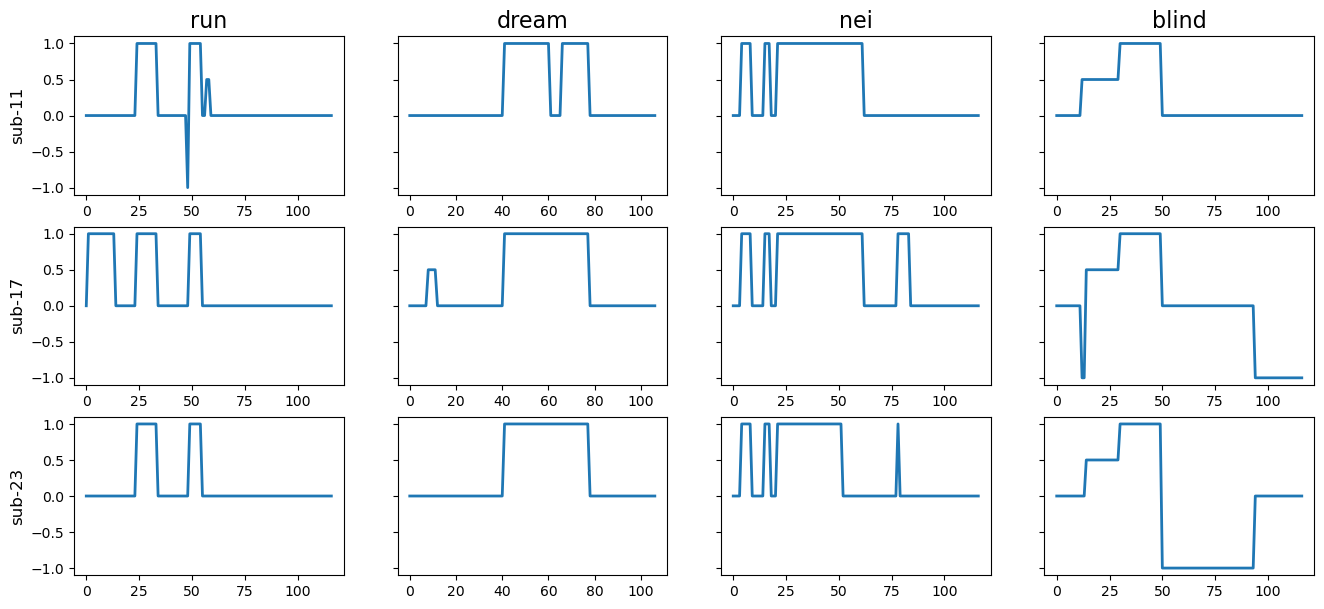

In [8]:
f,a = plt.subplots(nrows=3, ncols = 4, figsize=(16, 7),sharey=True)
for row, sub in enumerate([11, 17, 23]):
    for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
        a[row, col].plot(timecourse(sub, story), linewidth=2)
        a[0, col].set_title(f'{story}', fontsize=16)
        a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)

## B. Load AVERAGED time series of parcellation

In [34]:
# Load modules 
%matplotlib inline

import os
import glob
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, isfc, isps, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state
from scipy.stats import ttest_1samp
from scipy.signal import hilbert
import networkx as nx
from IPython.display import HTML

# import nest_asyncio
# nest_asyncio.apply()
import datalad.api as dl

In [35]:
# dir for neural 
story_dir = '/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/_DATA'
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'

# directory for behav
story_dir = '/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/_DATA'
base_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'

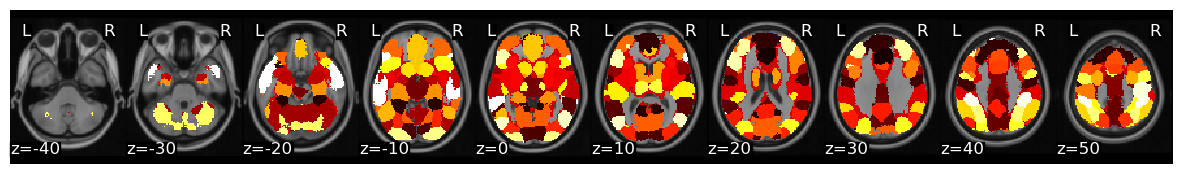

In [36]:
#Load brain mask
mask = Brain_Data('http://neurovault.org/media/images/2099/Neurosynth%20Parcellation_0.nii.gz')
mask_x = expand_mask(mask)

mask.plot()

In [37]:
#Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [8]
subjects = np.delete(sub_sm, sub_sm_exclude)
#print(subject)
print(subjects)

[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]


In [38]:
# load story sequence 
import scipy.io as sio

all_story = {}
# Load May Data
for sub in subjects:
    #print(sub)
    mat = sio.loadmat(glob.glob(os.path.join(story_dir, 'fMRItdsgn', 'fMRI_May', f'sub-{sub}_*.mat'))[0])
    story = []
    for i in np.arange(0,4):
        temp = mat['subj'][0][0][7][0][i][0]
        if temp == 'Blind Date':
            temp = 'BlindDate'
        elif temp == 'Runningman':
            temp = 'RunningMan'
        elif temp == 'Way To School':
            temp = 'WayToSchool'
        elif temp == 'Business Lunch':
            temp = 'BusinessLunch'
        elif temp == 'neighbors':
            temp = 'Neighbors'
        story = np.append(story, temp)
    #all_story[str(int(sub)+8)] = story
    all_story[sub] = story
#Fix story sequence
story_sequece = all_story[1]
story_sequece

array(['RunningMan', 'BlindDate', 'Dream', 'Neighbors'], dtype='<U32')

In [39]:
# Data Load & Trimming 
onset = {'set-4' :  [9, 119, 239, 359], 'set-6': [9, 129, 249, 369, 489 ], 'Dream1' : [9, 119, 239, 359], 'Dream2' : [9, 129, 239, 359], 'Dream3' : [9, 129, 249, 359], 'Dream4' : [9, 129, 249, 369]}
offset = {'set-4' : [116, 236, 356, 476], 'set-6': [126, 246, 366, 486, 606], 'Dream1' : [116, 236, 356, 476], 'Dream2' : [126, 236, 356, 476], 'Dream3' : [126, 246, 356, 476], 'Dream4' : [126, 246, 366, 476]} 
# May는 Dream의 위치에 따라 Trimming이 달라져야함.. ;D

sub_story_timeseries = {}
for sub in subjects:
    story = {} 
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    #print(sequence)
    cond = 'Dream'+str(int(sequence)+1)
    #print(cond)
    denoised_dir = os.path.join(May_dir, 'denoised', 'denoised_2023')
    if sub < 10:
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-2_Average_ROI_n50.csv')) 
    else: 
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-2_Average_ROI_n50.csv'))
    
    for i in np.arange(0,4):
        storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}
        story[storyName[all_story[sub][i]]] = {'visual' : data[onset[cond][i]:offset[cond][i]], 'audio' : data2[onset[cond][i]:offset[cond][i]]}
    
    sub_story_timeseries[sub] = story

In [40]:
#mapping rois to data

def get_story_roi(data, story, roi, sub):
    visual_story_roi = data[sub][story]['visual'].iloc[:, roi].reset_index(drop=True)
    audio_story_roi = data[sub][story]['audio'].iloc[:, roi].reset_index(drop=True)
    return pd.DataFrame(visual_story_roi), pd.DataFrame(audio_story_roi)

def get_story_roi_(data, story, roi, sub):
    story_roi = {}
    for cond in ['visual', 'audio']:
        story_roi[cond] =  data[sub][story][cond].iloc[:, roi].reset_index(drop=True)
    return pd.DataFrame(story_roi)
# def get_subject_roi(data, story, roi):
#     visual_sub_roi, audio_sub_roi = {}, {}
#     for sub in subjects:
#         visual_sub_roi[sub], audio_sub_roi[sub] = get_story_roi(data, story, roi, sub)
#     return pd.DataFrame(visual_sub_roi), pd.DataFrame(audio_sub_roi)

### plotting

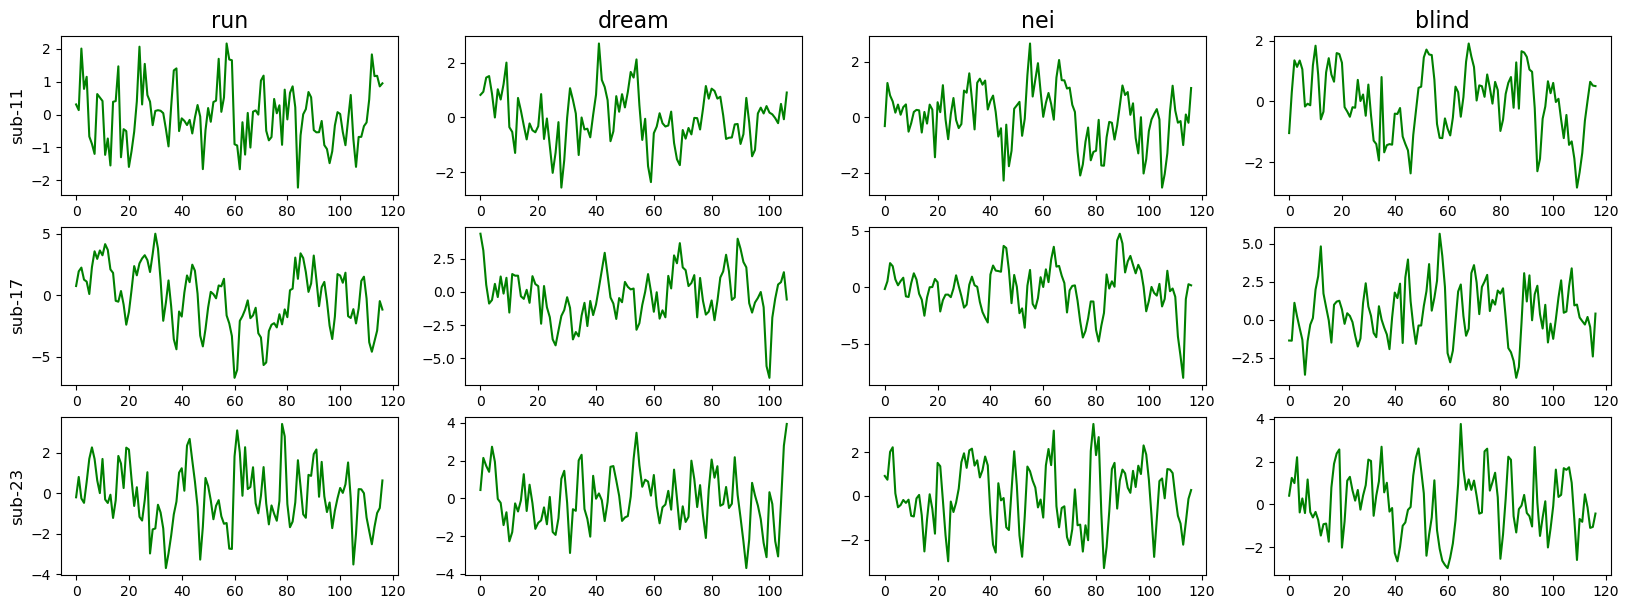

In [10]:
f,a = plt.subplots(nrows=3, ncols = 4, figsize=(20, 7))#,sharey=True)
roi = 5
for row, sub in enumerate([11, 17, 23]):
    for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
        vis_timeseries, aud_timeseries = get_story_roi(sub_story_timeseries, story, roi, sub) 
        diff_timeseries = aud_timeseries - vis_timeseries
        #a[row, col].plot(vis_timeseries, linewidth=1, color = 'blue', linestyle= '--')
        #a[row, col].plot(aud_timeseries, linewidth=1.5, color = 'orangered')
        a[row, col].plot(diff_timeseries, linewidth=1.5, color = 'green')
        a[0, col].set_title(f'{story}', fontsize=16)
        a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)

## C. Segmentation and average timeseries

In [41]:
# Compare behav and ROI 
# 5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
def plot_comparison(roi, cond, eb):
    window_size = 2

    story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
    story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}
    
    f,a = plt.subplots(nrows=3, ncols = 4, figsize=(16, 7))#,sharey=True)
    for row, sub in enumerate([11, 17, 23]):
        for col, story in enumerate(['run', 'dream', 'nei', 'blind']):

            vis_timeseries, aud_timeseries = get_story_roi(sub_story_timeseries, story, roi, sub) 
            diff_timeseries = aud_timeseries - vis_timeseries
            timeseries_smooth = aud_timeseries.rolling(window=window_size).mean() #smoothing 
            
            if cond == 'visual':
                eventBoundary = story_EB_visual
                timeseries = vis_timeseries
            elif cond == 'audio': 
                eventBoundary = story_EB_audio
                timeseries = aud_timeseries
            elif cond == 'diff':
                eventBoundary = story_EB_audio
                timeseries = diff_timeseries

            a[row, col].plot(timecourse(sub, story), linewidth=1.5, color = 'black') #behav
            a[row, col].plot(timeseries, linewidth = 1, color = 'lightseagreen')
            #a[row, col].plot(vis_timeseries, linewidth=1, color = 'blue', linestyle= '--') #1st ROIs timeseries
            #a[row, col].plot(aud_timeseries, linewidth=0.8, color = 'blue') #2nd ROIs timeseries
            #a[row, col].plot(diff_timeseries, linewidth=1.5, color = 'green')
            #a[row, col].plot(timeseries_smooth, linewidth=2, color = 'blue', linestyle= '--')

            a[0, col].set_title(f'{story}', fontsize=16)
            a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)
            if eb == 1:
                for idx, line in enumerate(eventBoundary[story]):
                    a[row, col].axvline(x=line, ymin=0, ymax=1, linewidth = 1.2, color='mediumslateblue', linestyle='--')

NameError: name 'timecourse' is not defined

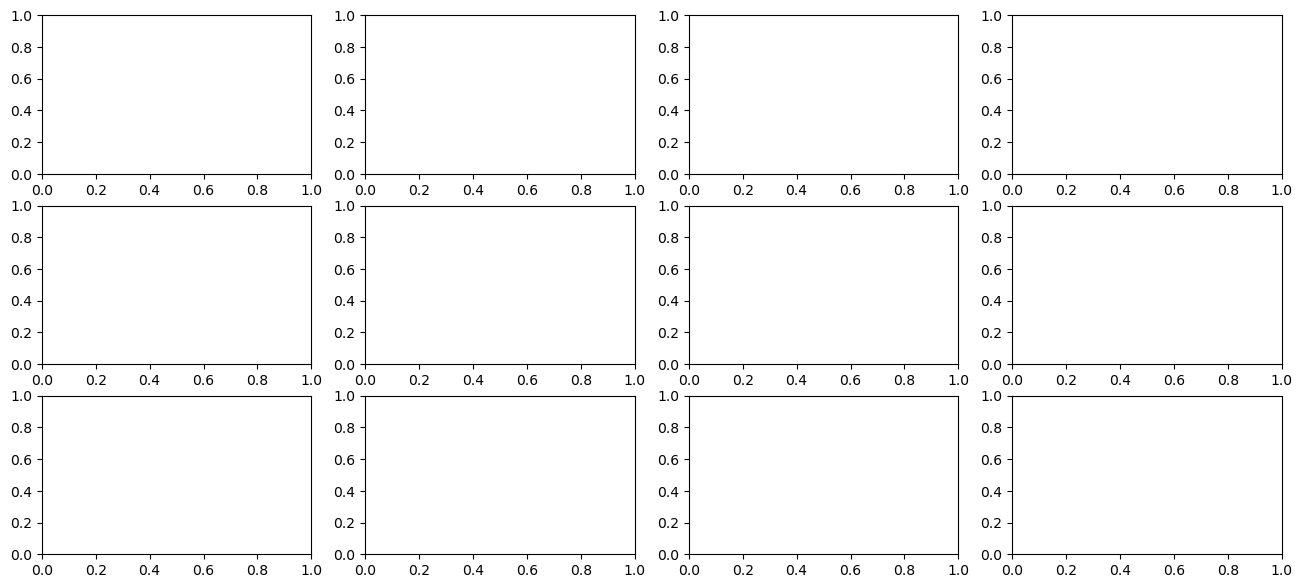

In [12]:
# ROI: 5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
# Cond: visual/audio/diff
# eb: 1 == yes, 0 == no 
plot_comparison(5, 'audio', 1)

# 2. time-series of HPC at the EB

## A. Neurosynth N = 50.

In [42]:
def get_story_roi(data, story, roi, sub):
    visual_story_roi = data[sub][story]['visual'].iloc[:, roi].reset_index(drop=True)
    audio_story_roi = data[sub][story]['audio'].iloc[:, roi].reset_index(drop=True)
    return pd.DataFrame(visual_story_roi), pd.DataFrame(audio_story_roi)

def get_story_roi_(data, story, roi, sub):
    story_roi = {}
    for cond in ['visual', 'audio']:
        story_roi[cond] =  data[sub][story][cond].iloc[:, roi].reset_index(drop=True)
    return pd.DataFrame(story_roi)

In [43]:
# segmentation of timeseries -EB & postEB 
# 1. EB 근처에서 activation increased ? 

from scipy.stats import zscore

def find_eventBoundary(roi, from_onset, from_offset):
    story_EB_visual = {'run' : [10,28,44,57,98], 'nei': [10,22,74,94], 'dream': [10,28,66,88], 'blind': [10,48,60,104]}
    story_EB_audio = {'run' : [10,26,49,58,98], 'nei': [10,43,62,72,94], 'dream': [10,17,27,66,89,106], 'blind': [10,36,88,104]}

    # story_EB_visual = {'run' : [28,44,57,98], 'nei': [22,74,94], 'dream': [28,66,88], 'blind': [48,60,104]}
    # story_EB_audio = {'run' : [26,49,58,98], 'nei': [43,62,72,94], 'dream': [17,27,66,89,106], 'blind': [36,88,104]}
    
    
    #story_EB_visual = {'run':[18,34, 48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,93]}
    #story_EB_audio = {'run':[16,48,68,88,108], 'dream':[8,18,78], 'nei':[32,62,84], 'blind':[25,77,95]}

    visual_story_mean_series, audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)

        visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
        audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
    #visaul_mean = visual_story_mean_series.mean(axis = 1)
    #audio_mean = audio_story_mean_series.mean(axis =1)
    return visual_story_mean_series, audio_story_mean_series

Text(0.5, 1.0, 'average timeseries in the 2nd Encoding')

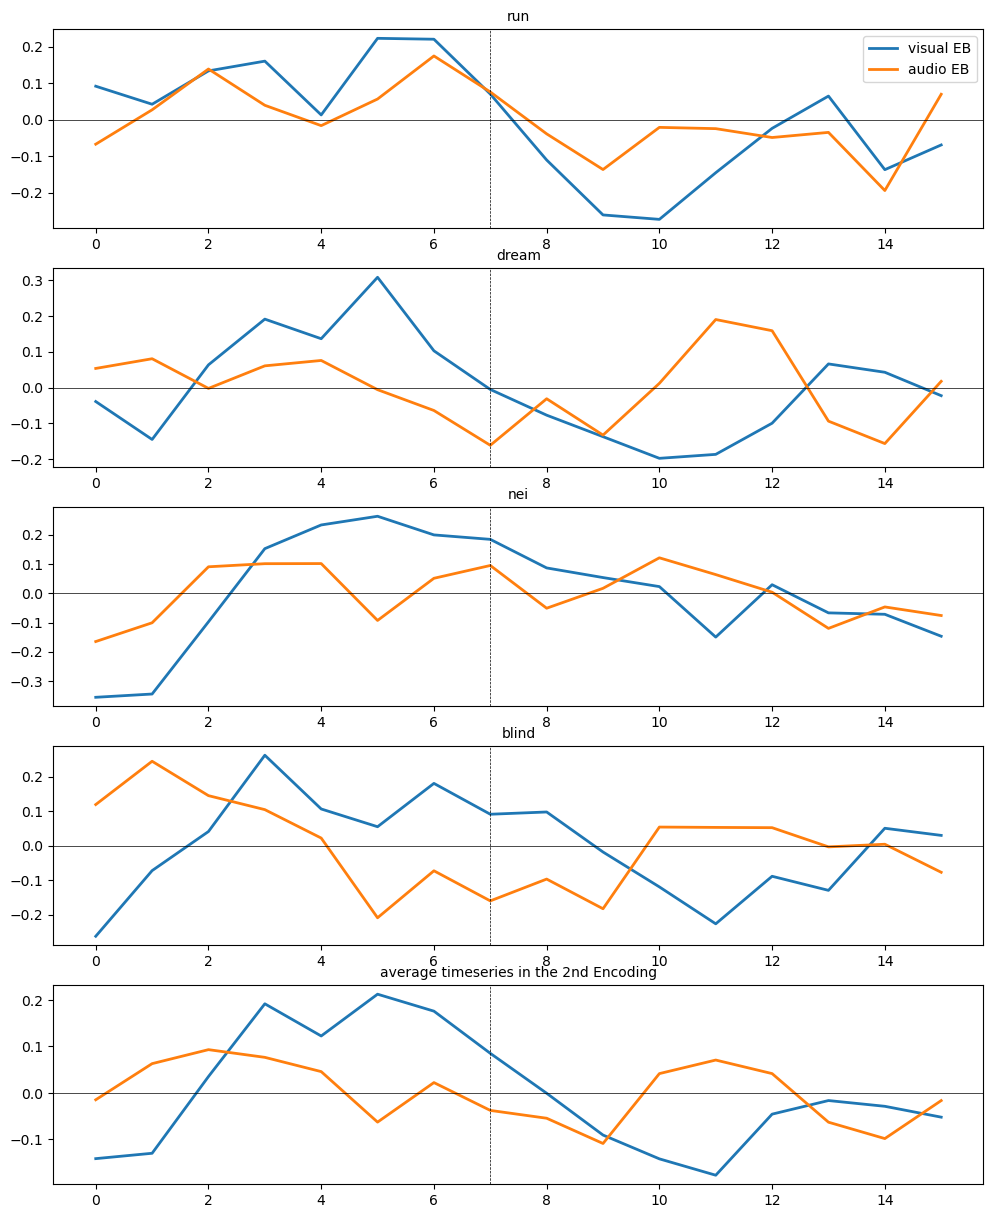

In [44]:
visual_story_mean_series,audio_story_mean_series = find_eventBoundary(28, 8, 8)
visaul_mean = visual_story_mean_series.mean(axis = 1) 
audio_mean = audio_story_mean_series.mean(axis =1)


f,a = plt.subplots(nrows=5, ncols = 1, figsize=(12, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(visual_story_mean_series[story], linewidth=2)
    a[col].plot(audio_story_mean_series[story], linewidth=2)
    a[col].axvline(x=7, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['visual EB', 'audio EB'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(visaul_mean, linewidth=2)
a[4].plot(audio_mean, linewidth=2)
a[4].axvline(x=7, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries in the 2nd Encoding', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

In [20]:
# segmentation of timeseries -EB & postEB 
# 1. EB 근처에서 activation increased ? 
story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

# sub-11 
roi = 28

from scipy.stats import zscore

visual_story_mean_series, audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
for story in ['run', 'dream', 'nei', 'blind']:
    visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
    for sub in subjects: 
        visual_data, audio_data = get_story_roi(BN_sub_story_timeseries, story, roi, sub)
    #segmentation of HPC : -2~15TR 
        visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
        for idx, num in enumerate(story_EB_visual[story]):
            onset = num - 6 
            offset = num + 7
            series = visual_data[onset:offset].reset_index(drop=True)
            visual_segment[idx] = series.apply(zscore) 
            visaul_mean = visual_segment.mean(axis=1)
        visual_sum_seg[sub] = visual_segment.mean(axis=1)

        for idx, num in enumerate(story_EB_audio[story]):
            onset = num - 6 
            offset = num + 7
            series = audio_data[onset:offset].reset_index(drop=True)
            audio_segment[idx] = series.apply(zscore) 
        audio_sum_seg[sub] = audio_segment.mean(axis=1)

    visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
    audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
visaul_mean = visual_story_mean_series.mean(axis = 1)
audio_mean = audio_story_mean_series.mean(axis =1)

NameError: name 'BN_sub_story_timeseries' is not defined

### start EB vs. mid EB vs. end EB

In [21]:
def compare_startNend_eventBoundary(roi, from_onset, from_offset):
    story_start_EB_visual = {'run':[18], 'dream':[6,18], 'nei':[64], 'blind':[50]}
    story_start_EB_audio = {'run':[16], 'dream':[8,18], 'nei':[32], 'blind':[25]}
    
    story_end_EB_visual = {'run':[88], 'dream':[78], 'nei':[85], 'blind':[93]}
    story_end_EB_audio = {'run':[108], 'dream':[78], 'nei':[84], 'blind':[95]}
    
    # story_EB_visual = {'run':[18,34, 48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,93]}
    # story_EB_audio = {'run':[16,48,68,88,108], 'dream':[8,18,78], 'nei':[32,62,84], 'blind':[25,77,95]}

    start_visual_story_mean_series, start_audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_start_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_start_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)

        start_visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
        start_audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
        
    end_visual_story_mean_series, end_audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_end_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_end_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)
        end_visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
        end_audio_story_mean_series[story] = audio_sum_seg.mean(axis =1)
    return start_visual_story_mean_series, start_audio_story_mean_series, end_visual_story_mean_series, end_audio_story_mean_series

Text(0.5, 1.0, 'average timeseries at the start EB')

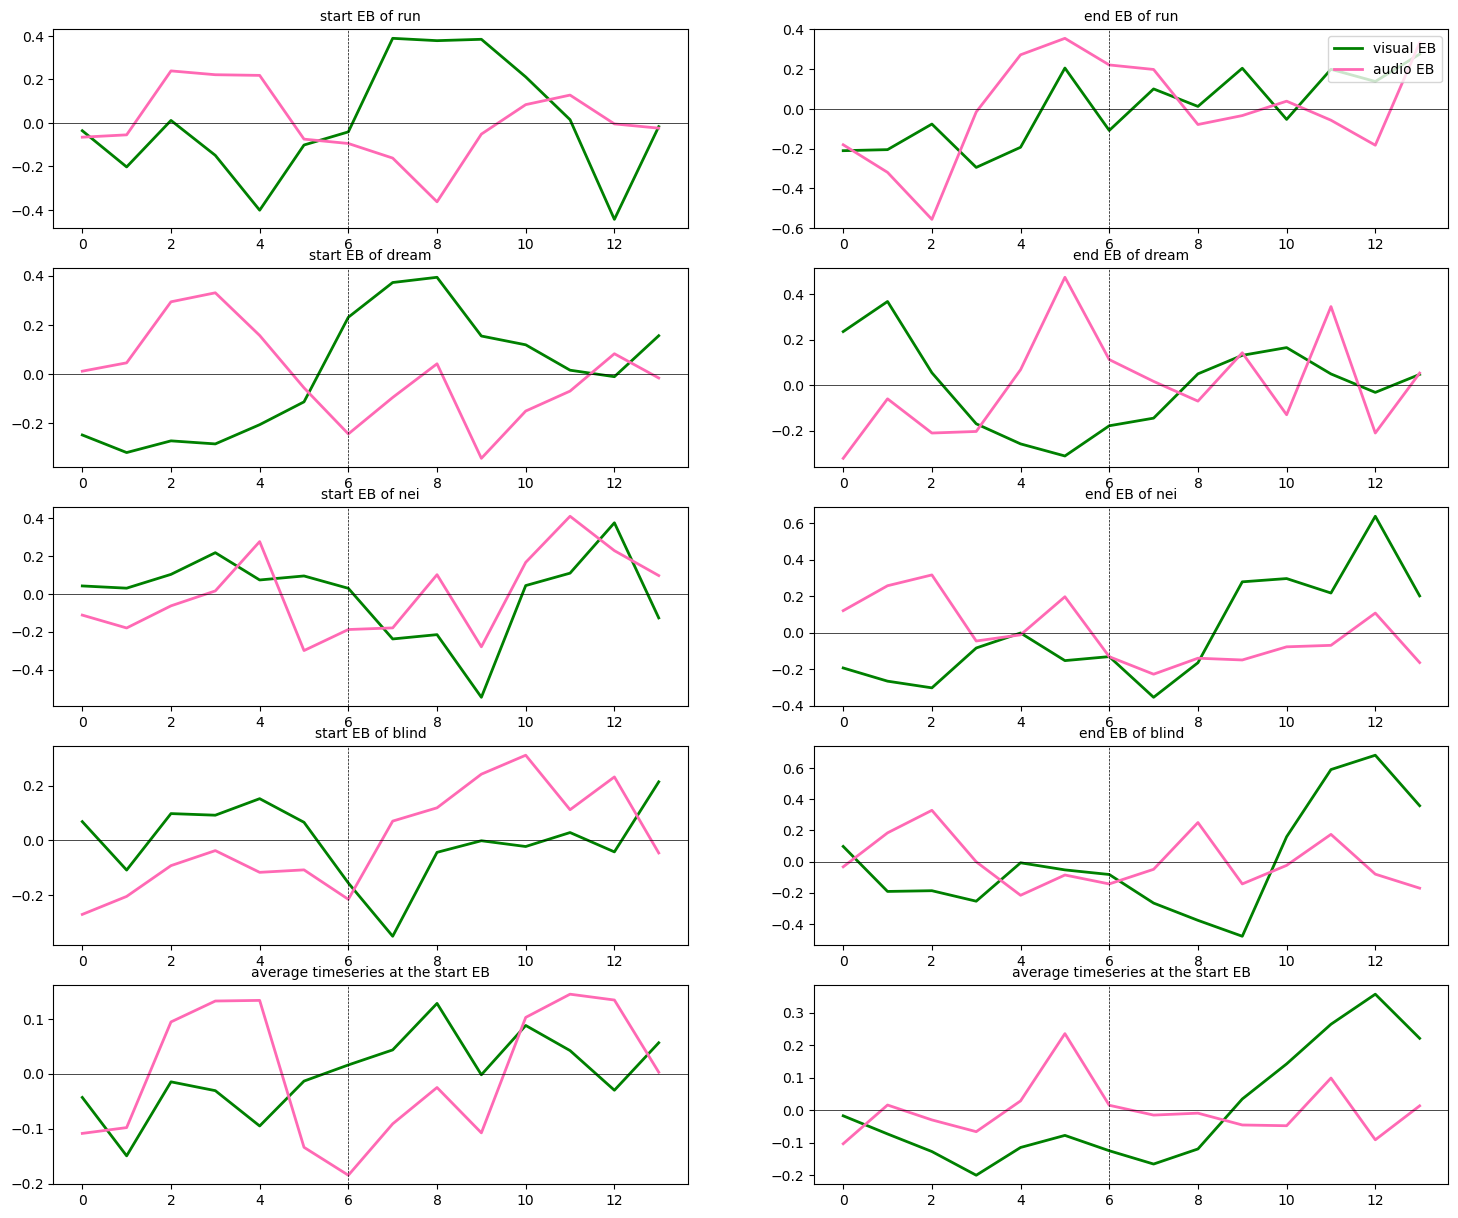

In [22]:
start_vis_mean, start_aud_mean, end_vis_mean, end_aud_mean = compare_startNend_eventBoundary(28, 6, 8)
start_visaul_mean = start_vis_mean.mean(axis = 1) 
start_audio_mean = start_aud_mean.mean(axis =1)

end_visaul_mean = end_vis_mean.mean(axis = 1) 
end_audio_mean = end_aud_mean.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(start_vis_mean[story], linewidth=2, color = 'green')
    a[col,0].plot(start_aud_mean[story], linewidth=2, color = 'hotpink')
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    
    a[col,1].plot(end_vis_mean[story], linewidth=2, color = 'green')
    a[col,1].plot(end_aud_mean[story], linewidth=2, color = 'hotpink')
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f'start EB of {story}', fontsize=10)
    a[0,1].legend(['visual EB', 'audio EB'], loc = 'upper right')
    
    a[col,1].set_title(f'end EB of {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(start_visaul_mean, linewidth=2, color = 'green')
a[4,0].plot(start_audio_mean, linewidth=2, color = 'hotpink')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries at the start EB', fontsize=10)

a[4,1].plot(end_visaul_mean, linewidth=2, color = 'green')
a[4,1].plot(end_audio_mean, linewidth=2, color = 'hotpink')
a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries at the start EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

Text(0.5, 1.0, 'average timeseries of audio EB')

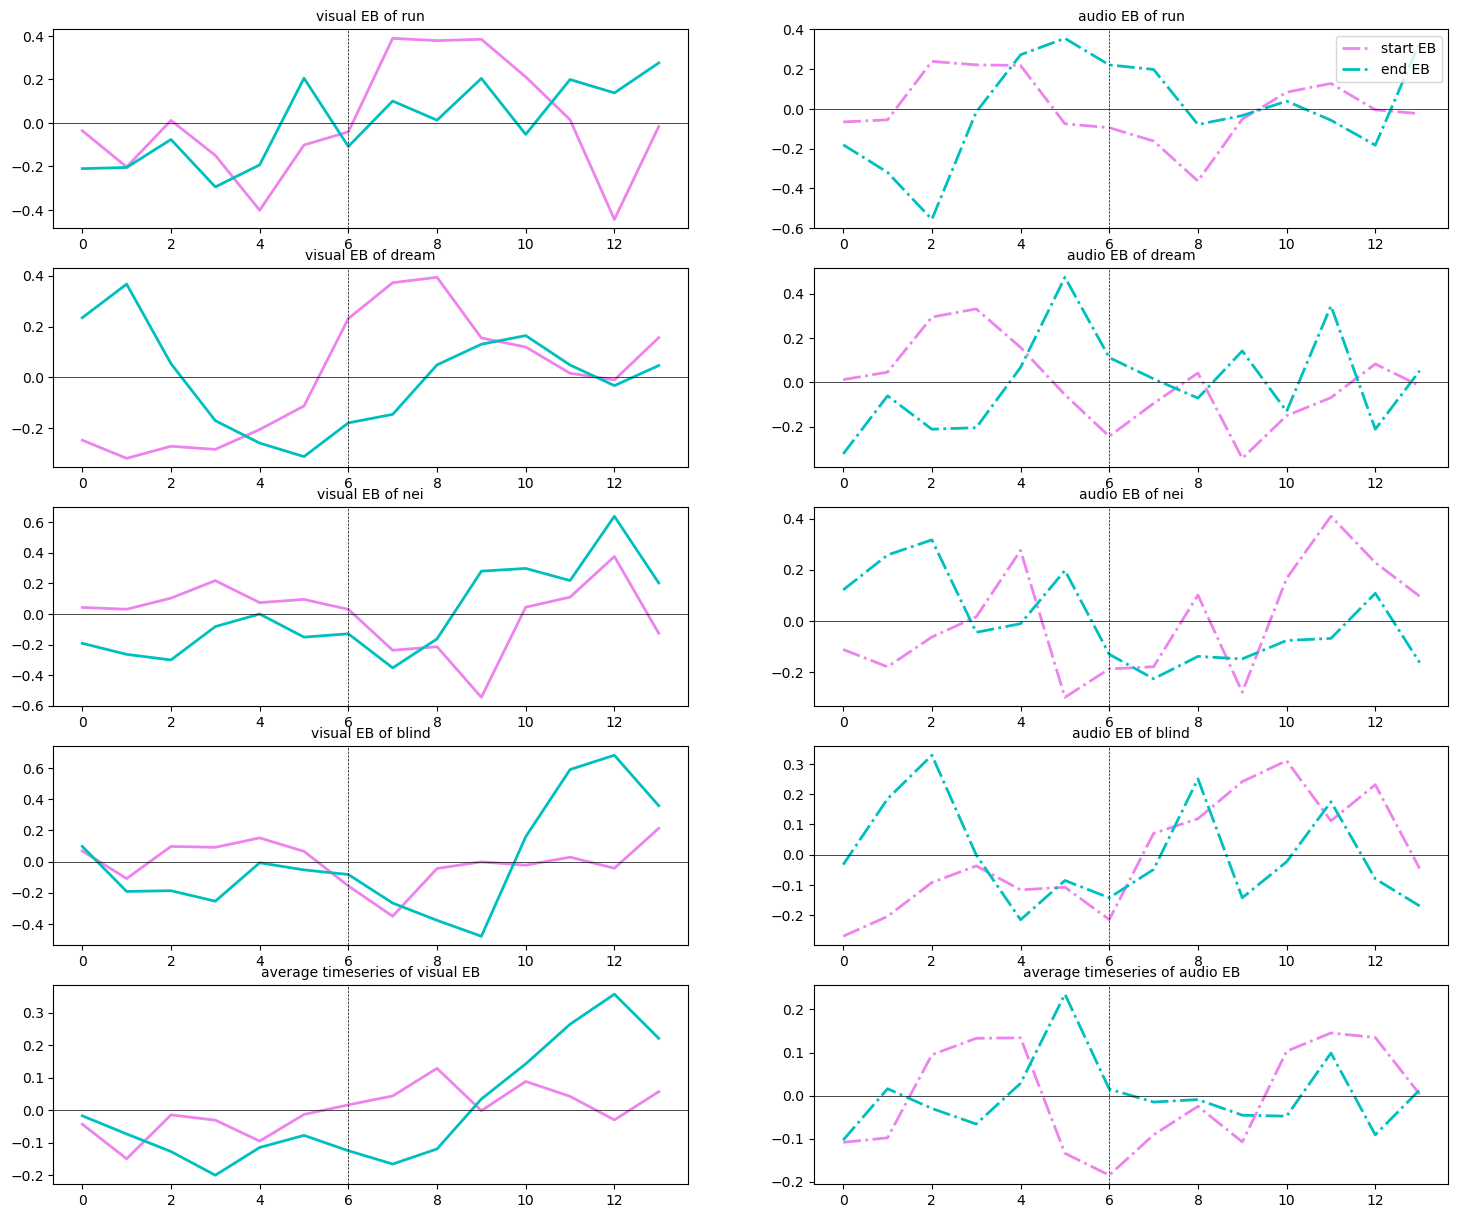

In [23]:
start_vis_mean, start_aud_mean, end_vis_mean, end_aud_mean = compare_startNend_eventBoundary(28, 6, 8)
start_visaul_mean = start_vis_mean.mean(axis = 1) 
start_audio_mean = start_aud_mean.mean(axis =1)

end_visaul_mean = end_vis_mean.mean(axis = 1) 
end_audio_mean = end_aud_mean.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(start_vis_mean[story], linewidth=2, color = 'violet')
    a[col,0].plot(end_vis_mean[story], linewidth=2, color = 'c')
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f'visual EB of {story}', fontsize=10)
    
    a[col,1].plot(start_aud_mean[story], linewidth=2, color = 'violet', linestyle = '-.')
    a[col,1].plot(end_aud_mean[story], linewidth=2, color = 'c', linestyle = '-.')
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[0,1].legend(['start EB', 'end EB'], loc = 'upper right')
    a[col,1].set_title(f'audio EB of {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(start_visaul_mean, linewidth=2, color = 'violet')
a[4,0].plot(end_visaul_mean, linewidth=2, color = 'c')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries of visual EB', fontsize=10)

a[4,1].plot(start_audio_mean, linewidth=2, color = 'violet', linestyle = '-.')
a[4,1].plot(end_audio_mean, linewidth=2, color = 'c', linestyle = '-.')
a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries of audio EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

### Yes-update/ No-update EB 

In [29]:
run_update_point = {1 : [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 2: [59, 60, 61, 62, 63, 64]}
dream_update_point = {1:[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]}
nei_update_point = {1:[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]}
bli_update_point = {1: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}

def yesNno_update_eventBoundary(roi, from_onset, from_offset):
    story_yes_update_EB_visual = {'run':[48,88], 'dream':[78], 'nei':[64], 'blind':[50]}
    story_yes_update_EB_audio = {'run':[48,68], 'dream':[78], 'nei':[62], 'blind':[77]}
    
    story_no_update_EB_visual = {'run':[18,34], 'dream':[6,18], 'nei':[85], 'blind':[93]}
    story_no_update_EB_audio = {'run':[16,88,108], 'dream':[8,18], 'nei':[32,84], 'blind':[25,95]}

    story_yes_update_visual, story_yes_update_audio = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_yes_update_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_yes_update_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)

        story_yes_update_visual[story] = visual_sum_seg.mean(axis = 1)
        story_yes_update_audio[story] = audio_sum_seg.mean(axis = 1)
        
    story_no_update_visual, story_no_update_audio = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_no_update_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_no_update_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)
        story_no_update_visual[story] = visual_sum_seg.mean(axis = 1)
        story_no_update_audio[story] = audio_sum_seg.mean(axis =1)
    return story_yes_update_visual, story_yes_update_audio, story_no_update_visual, story_no_update_audio

Text(0.5, 1.0, 'average timeseries of audio EB')

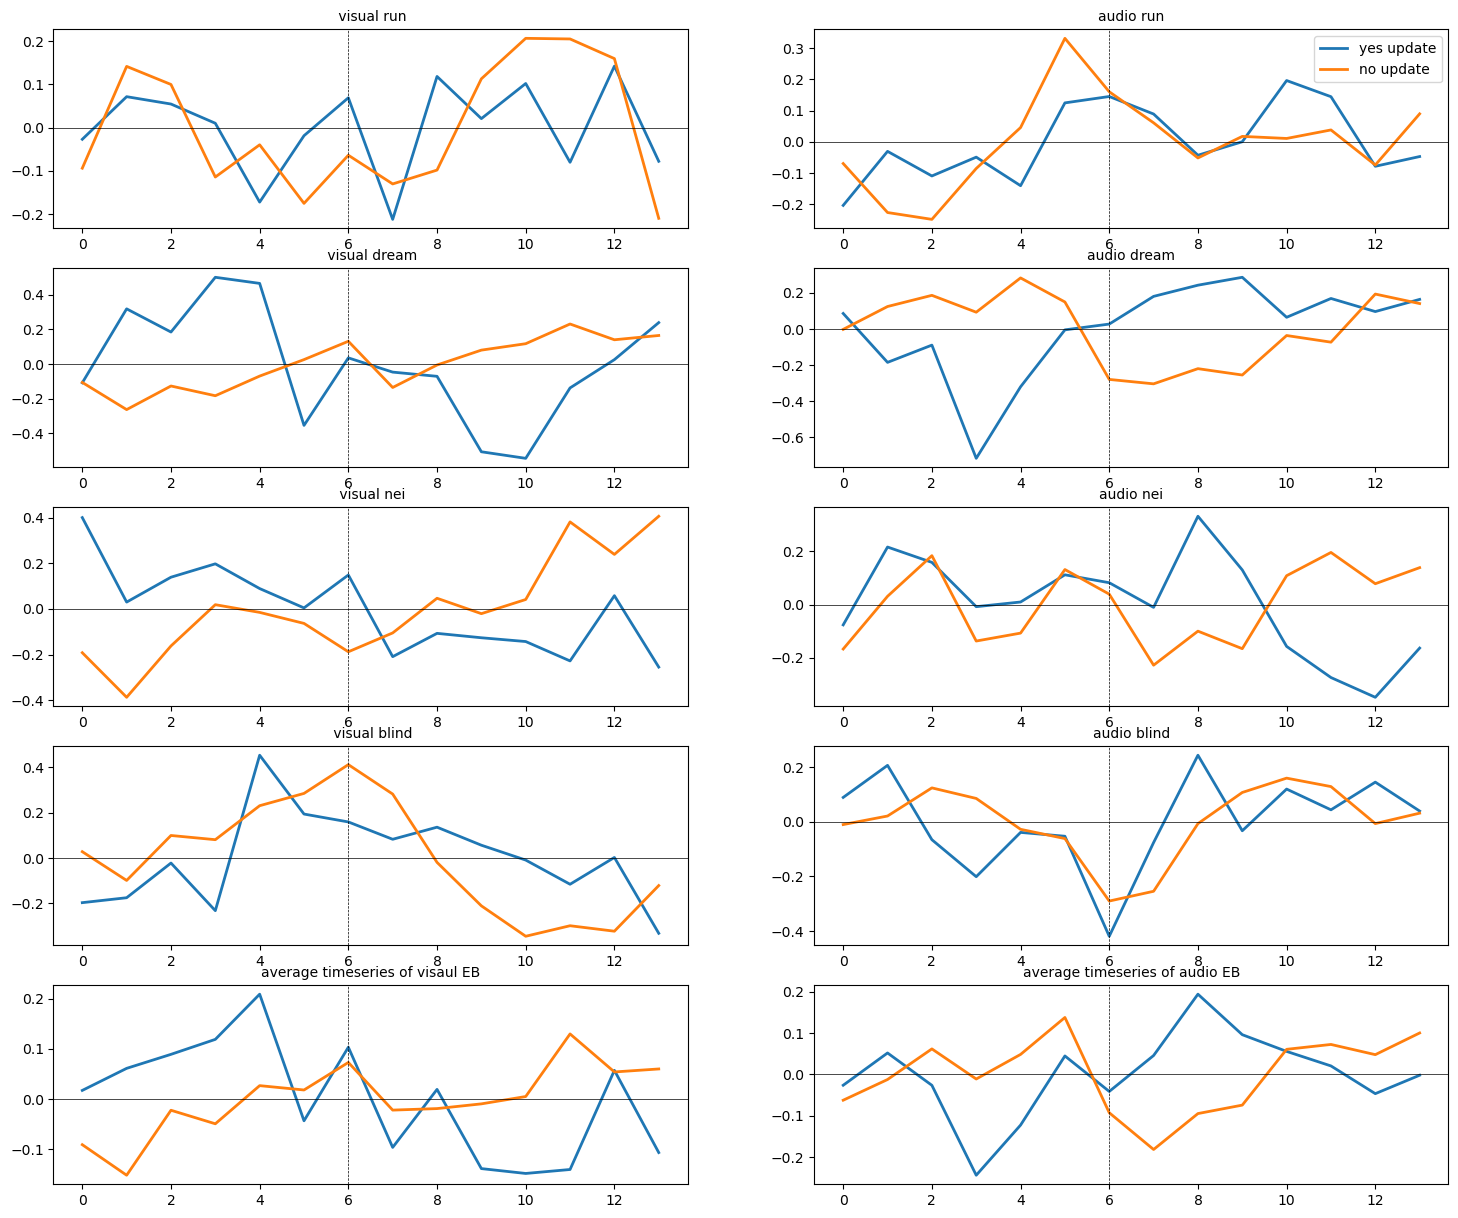

In [75]:
yes_update_visual, yes_update_audio, no_update_visual, no_update_audio = yesNno_update_eventBoundary(19, 6, 8) # -> 19 & 28 change 
yes_update_visaul_mean = yes_update_visual.mean(axis = 1) 
yes_update_audio_mean = yes_update_audio.mean(axis =1)

no_update_visaul_mean = no_update_visual.mean(axis = 1) 
no_update_audio_mean = no_update_audio.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(yes_update_visual[story], linewidth=2)#, color = 'violet')
    a[col,0].plot(no_update_visual[story], linewidth=2)#, color = 'c')
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f' visual {story}', fontsize=10)
    
    a[col,1].plot(yes_update_audio[story], linewidth=2)#, color = 'violet', linestyle = '-.')
    a[col,1].plot(no_update_audio[story], linewidth=2)#, color = 'c', linestyle = '-.')
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[0,1].legend(['yes update', 'no update'], loc = 'upper right')
    a[col,1].set_title(f'audio {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(yes_update_visaul_mean, linewidth=2)#, color = 'violet')
a[4,0].plot(no_update_visaul_mean, linewidth=2)#, color = 'c')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries of visaul EB', fontsize=10)

a[4,1].plot(yes_update_audio_mean, linewidth=2)#, color = 'violet', linestyle = '-.')
a[4,1].plot(no_update_audio_mean, linewidth=2)#, color = 'c', linestyle = '-.')
a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries of audio EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

Text(0.5, 1.0, 'average timeseries of No-update EB')

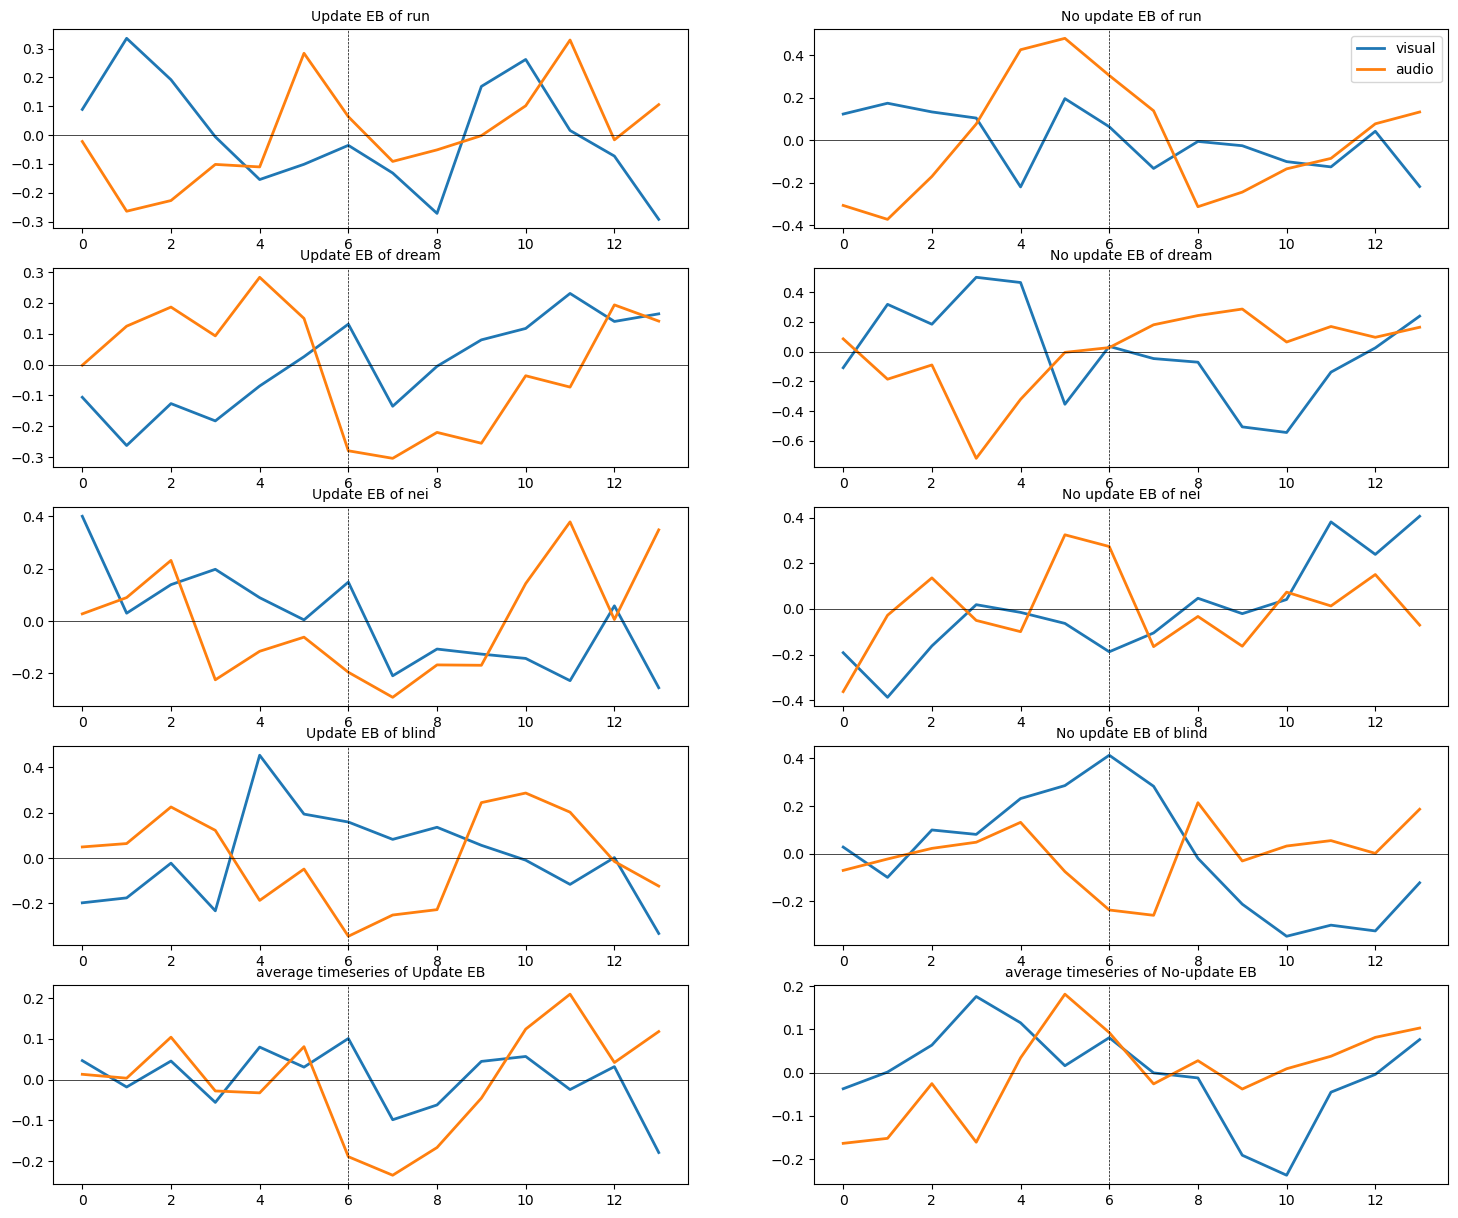

In [69]:
yes_update_visual, yes_update_audio, no_update_visual, no_update_audio = compare_startNend_eventBoundary(32, 6, 8)
yes_update_visaul_mean = yes_update_visual.mean(axis = 1) 
yes_update_audio_mean = yes_update_audio.mean(axis =1)

no_update_visaul_mean = no_update_visual.mean(axis = 1) 
no_update_audio_mean = no_update_audio.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(yes_update_visual[story], linewidth=2)#, color = 'violet')
    a[col,0].plot(yes_update_audio[story], linewidth=2)#, color = 'c')
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f'Update EB of {story}', fontsize=10)
    
    a[col,1].plot(no_update_visual[story], linewidth=2)#, color = 'violet', linestyle = '-.')
    a[col,1].plot(no_update_audio[story], linewidth=2)#, color = 'c', linestyle = '-.')
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[0,1].legend(['visual', 'audio'], loc = 'upper right')
    a[col,1].set_title(f'No update EB of {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(yes_update_visaul_mean, linewidth=2)#, color = 'violet')
a[4,0].plot(yes_update_audio_mean, linewidth=2)#, color = 'c')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries of Update EB', fontsize=10)

a[4,1].plot(no_update_visaul_mean, linewidth=2)#, color = 'violet', linestyle = '-.')
a[4,1].plot(no_update_audio_mean, linewidth=2)#, color = 'c', linestyle = '-.')
a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries of No-update EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

### PreEB vs PostEB vs EB 

In [41]:
# segmentation of timeseries -EB & postEB 
# 1. EB 근처에서 activation increased ? 
story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

# sub-11 
roi = 5

from scipy.stats import zscore

visual_story_mean_series, audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
for story in ['run', 'dream', 'nei', 'blind']:
    visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
    for sub in subjects: 
        visual_data, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
    #segmentation of HPC : -2~15TR 
        visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
        for idx, num in enumerate(story_EB_visual[story]):
            onset = num - 6 
            offset = num + 7
            series = visual_data[onset:offset].reset_index(drop=True)
            visual_segment[idx] = series.apply(zscore) 
            visaul_mean = visual_segment.mean(axis=1)
        visual_sum_seg[sub] =visual_segment.mean(axis=1)

        for idx, num in enumerate(story_EB_audio[story]):
            onset = num - 6 
            offset = num + 7
            series = audio_data[onset:offset].reset_index(drop=True)
            audio_segment[idx] = series.apply(zscore) 
        audio_sum_seg[sub] = audio_segment.mean(axis=1)

    visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
    audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
visaul_mean = visual_story_mean_series.mean(axis = 1)
audio_mean = audio_story_mean_series.mean(axis =1)

In [53]:
# 3. Comapre spatial correlation

onset = {'Dream1' : [9, 119, 239, 359], 'Dream2' : [9, 129, 239, 359], 'Dream3' : [9, 129, 249, 359], 'Dream4' : [9, 129, 249, 369]}
offset = {'Dream1' : [116, 236, 356, 476], 'Dream2' : [126, 236, 356, 476], 'Dream3' : [126, 246, 356, 476], 'Dream4' : [126, 246, 366, 476]} 

denoised_dir = os.path.join(May_dir, 'denoised', 'denoised_2023')

sub_story_rois = {}
for sub in subjects:
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    cond = 'Dream'+str(int(sequence)+1)
    
    sub_rois= {}  
    for roi in [5,6,19,28,32]:
        if sub < 10:
            data = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-0{sub}_task-encoding_run-1_denoised_roi{roi}.csv'))   
            data2 = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-0{sub}_task-encoding_run-2_denoised_roi{roi}.csv')) 
        else: 
            data = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-{sub}_task-encoding_run-1_denoised_roi{roi}.csv'))   
            data2 = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-{sub}_task-encoding_run-2_denoised_roi{roi}.csv'))
            
        stories = {} 
        for i in np.arange(0,4):
            storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}
            stories[storyName[all_story[sub][i]]] = {'visual' : data[onset[cond][i]:offset[cond][i]], 'audio' : data2[onset[cond][i]:offset[cond][i]]}
        sub_rois[roi] = stories
        
    sub_story_rois[sub] = sub_rois

In [54]:
def get_rois_timeseries(data, roi, story, sub, time):
    visual = data[sub][roi][story]['visual'].reset_index(drop=True)
    audio = data[sub][roi][story]['audio'].reset_index(drop=True)
    vis_time = visual.iloc[time]
    aud_time = audio.iloc[time]
    return np.array(vis_time), np.array(aud_time)

roi_timeseries = {} 
for roi in [5,6, 19, 28,32]:
    story_timeseries = {}
    for story in ['run', 'blind', 'dream', 'nei']:
        time_series = sub_story_rois[1][roi][story]['visual'].reset_index(drop=True).shape[0]
        corr_timeseries = pd.DataFrame()
        for time in range(time_series): 
            visual, audio = pd.DataFrame(), pd.DataFrame()
            for sub in subjects:                # stack subjects' responses 
                vis, aud = get_rois_timeseries(sub_story_rois, roi, story, sub, time)
                visual[sub] = vis
                audio[sub] = aud   #shape = (num of vertors, sub)
            #Zscoring ? 
            #get correlation 
            temp_corr = np.array(visual.corrwith(audio)) # 32명의 corr between audio voxels and visual voxels  -> (32, ) 
            corr_timeseries[time] = temp_corr # 32 명의 corr_vectors 가 117개의 시점에서 
        story_timeseries[story] = corr_timeseries
    roi_timeseries[roi] = story_timeseries

# def get_intra_corr_within_ROI()
#     roi_timeseries = {} 
#     for roi in [5, 19, 28]:
#         story_timeseries = {}
#         for story in ['run', 'blind', 'dream', 'nei']:
#             time_series = sub_story_rois[1][roi][story]['visual'].reset_index(drop=True).shape[0]
#             corr_timeseries = pd.DataFrame()
#             for time in range(time_series): 
#                 visual, audio = pd.DataFrame(), pd.DataFrame()
#                 for sub in subjects:                # stack subjects' responses 
#                     vis, aud = get_rois_timeseries(sub_story_rois, roi, story, sub, time)
#                     visual[sub] = vis
#                     audio[sub] = aud   #shape = (num of vertors, sub)
#                 #Zscoring ? 
#                 #get correlation 
#                 temp_corr = np.array(visual.corrwith(audio)) # 32명의 corr between audio voxels and visual voxels  -> (32, ) 
#                 corr_timeseries[time] = temp_corr # 32 명의 corr_vectors 가 117개의 시점에서 
#             story_timeseries[story] = corr_timeseries
#         roi_timeseries[roi] = story_timeseries
#     return roi_timeseries
           

In [169]:
roi_timeseries[5]['run']

0         1         2         3         4         5         6    \
0  -0.504902 -0.119638 -0.017829 -0.002354 -0.340554 -0.397438 -0.335128   
1   0.166252  0.070912 -0.013647 -0.002001 -0.159927 -0.202858 -0.023587   
2   0.388619  0.039377  0.141208  0.103621  0.172999  0.260619  0.329482   
3   0.102786  0.284078 -0.104039 -0.109693 -0.123465 -0.064260  0.416739   
4   0.388429  0.033977  0.130267  0.104253  0.175720  0.262326  0.334446   
5   0.213872 -0.158781 -0.007946  0.305751  0.222955  0.193273  0.311716   
6   0.103168 -0.025833 -0.004005 -0.033939 -0.028349 -0.007525 -0.079122   
7   0.303830 -0.050348  0.033343  0.123702 -0.074869  0.099769  0.097799   
8   0.031538  0.057092  0.197711  0.248372  0.565765  0.155592  0.107717   
9  -0.153859  0.083929 -0.092903 -0.074750 -0.088022  0.009811 -0.017614   
10  0.546034  0.373202  0.286782  0.090247  0.293495 -0.026016 -0.029435   
11  0.196682 -0.227330  0.071611  0.163125  0.178286  0.253090 -0.011820   
12 -0.075367  0.008335  0.162731 -0.014388  0.031545 -0.018916  0.020929   
13  0.070055  0.154521  0.112187 -0.042643 -0.061673 -0.006296 -0.141211   
14 -0.008834 -0.012062 -0.031193  0.028725 -0.011806  0.064557 -0.003430   
15  0.207646  0.092023  0.124764  0.162580  0.120236  0.105982 -0.161262   
16 -0.212824 -0.082739 -0.098543  0.076681  0.003312  0.520381  0.090854   
17  0.015901 -0.135207  0.009136 -0.089119 -0.143725  0.130182  0.113405   
18 -0.013015 -0.169401 -0.020363 -0.256807 -0.022048  0.063023  0.133227   
19  0.053587  0.134764  0.302737  0.059738  0.533631  0.340106  0.251245   
20  0.195720  0.046739  0.200177  0.024432  0.054891  0.080550  0.014531   
21  0.132829  0.246314  0.259306  0.331456 -0.000038 -0.113725  0.090309   
22 -0.025024  0.001205 -0.003526  0.162648  0.457308 -0.011152  0.294230   
23 -0.366371  0.085966 -0.020955  0.302474 -0.227808  0.060976 -0.004745   
24  0.054144  0.047147  0.019152 -0.037433 -0.042460  0.438657  0.105938   
25 -0.095837  0.202953 -0.207596 -0.014036  0.378842  0.119863  0.276050   
26  0.267837  0.176495 -0.024909 -0.111023  0.003270 -0.133733  0.030628   
27 -0.094881 -0.149508 -0.215323  0.242166  0.344280  0.068045 -0.235735   
28  0.062685 -0.020428 -0.047903  0.101230 -0.049772  0.003345  0.028536   
29  0.073932  0.197687  0.193198  0.171445  0.070992  0.188871 -0.291230   
30 -0.030044  0.267416  0.146477 -0.029455  0.176922  0.054664  0.092545   
31  0.141776  0.015252  0.076354  0.032969  0.214327  0.032471  0.379701   

         7         8         9    ...       107       108       109       110  \
0  -0.351804 -0.334514 -0.008098  ... -0.023784 -0.019724 -0.003937  0.010189   
1   0.092151  0.309375  0.153711  ... -0.118961 -0.438069 -0.282089 -0.018885   
2   0.104524  0.113449 -0.015814  ...  0.187318  0.214675  0.181440 -0.059894   
3   0.118027  0.115756  0.124813  ...  0.279626  0.060241 -0.002703  0.028628   
4   0.107284  0.113565 -0.019619  ...  0.193242  0.205387  0.186895 -0.061537   
5   0.250952  0.373133  0.179602  ...  0.243235  0.181476 -0.186662  0.450483   
6   0.102739 -0.033258  0.007864  ...  0.003725 -0.006566  0.393325 -0.083090   
7  -0.221054 -0.016665 -0.103309  ...  0.393492 -0.083738 -0.027079 -0.031514   
8  -0.035751  0.087290 -0.227789  ...  0.017661  0.349485  0.326263  0.232229   
9   0.004853  0.271357  0.443995  ... -0.004657 -0.059880 -0.030889  0.098326   
10 -0.134959 -0.003765 -0.030829  ...  0.467934  0.447896  0.334029  0.066586   
11 -0.248973 -0.089960 -0.028414  ... -0.063558  0.037711  0.060740 -0.193774   
12 -0.055743 -0.023350  0.021208  ... -0.114733  0.044236  0.009666 -0.023317   
13  0.016986 -0.053106 -0.001230  ...  0.123159  0.250187  0.263101  0.248609   
14 -0.388368 -0.226969 -0.099044  ...  0.166671  0.240685  0.224616  0.163183   
15 -0.059749  0.035476  0.030657  ...  0.062903  0.017393 -0.029448  0.016385   
16  0.162161  0.143335  0.159075  ... -0.307604 -0.133393 -0.250756  0.036572   
17  0.245731  0.053316 -0.083450  ...  0.2

In [55]:
# segment according to EB 
def find_corr_at_eventBoundary(roi, eb, from_onset, from_offset):
    if eb == 'story_vis':
        event_boundary = {'run':[18,34, 48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,93]}
    elif eb == 'story_aud':
        event_boundary = {'run':[16,48,68,88,108], 'dream':[8,18,78], 'nei':[32,62,84], 'blind':[25,77,95]}
    elif eb == 'start_vis':
        event_boundary = {'run':[18], 'dream':[6,18], 'nei':[64], 'blind':[50]}
    elif eb == 'start_aud':
        event_boundary = {'run':[16], 'dream':[8,18], 'nei':[32], 'blind':[25]}
    elif eb == 'end_aud':
        event_boundary = {'run':[88], 'dream':[78], 'nei':[85], 'blind':[93]}
    elif eb == 'end_aud':
        event_boundary = {'run':[108], 'dream':[78], 'nei':[84], 'blind':[95]}

    corr_story_mean_series = pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        for sub in range(32):
            corr_data = roi_timeseries[roi][story].iloc[sub]
            corr_seg_sum = pd.DataFrame()
            for idx, num in enumerate(event_boundary[story]):
                onset = num - from_onset
                offset = num + from_offset
                corr_seg_sum[idx] = corr_data[onset:offset].reset_index(drop=True) 
            corr_seg_sum[sub] =corr_seg_sum.apply(zscore).mean(axis=1)

        corr_story_mean_series[story] = corr_seg_sum.mean(axis = 1)
    return corr_story_mean_series

Text(0.5, 1.0, 'average timeseries in the 2nd Encoding')

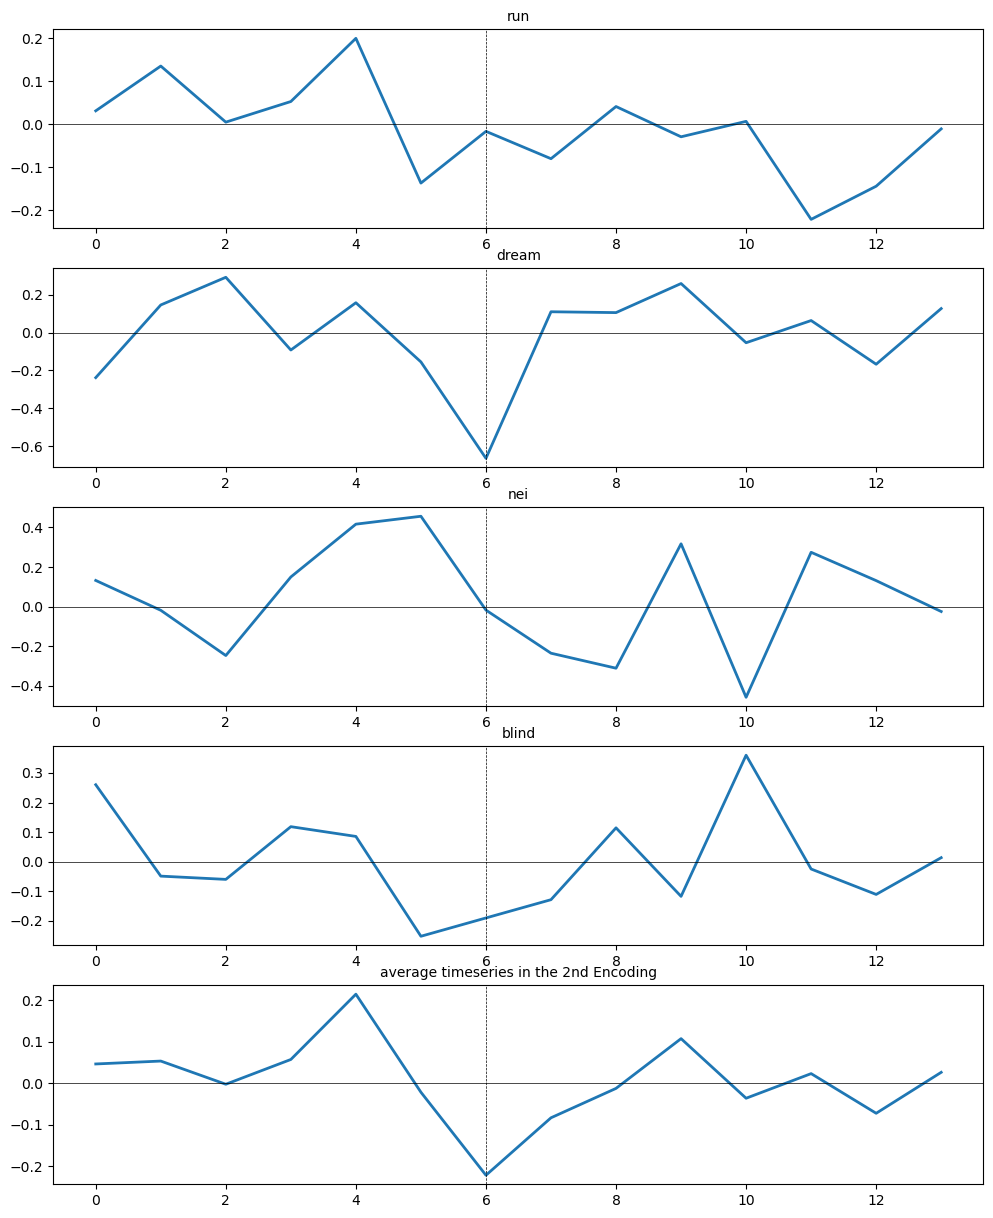

In [45]:
corr_mean_series = find_corr_at_eventBoundary(28,'story_aud', 6, 8)
corr_mean = corr_mean_series.mean(axis = 1) 


f,a = plt.subplots(nrows=5, ncols = 1, figsize=(12, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(corr_mean_series[story], linewidth=2)
    a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    #a[0].legend(['visual EB', 'audio EB'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(corr_mean, linewidth=2)
a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries in the 2nd Encoding', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

## Compare corr and activation 

Text(0.5, 1.0, 'average timeseries in the 2nd Encoding')

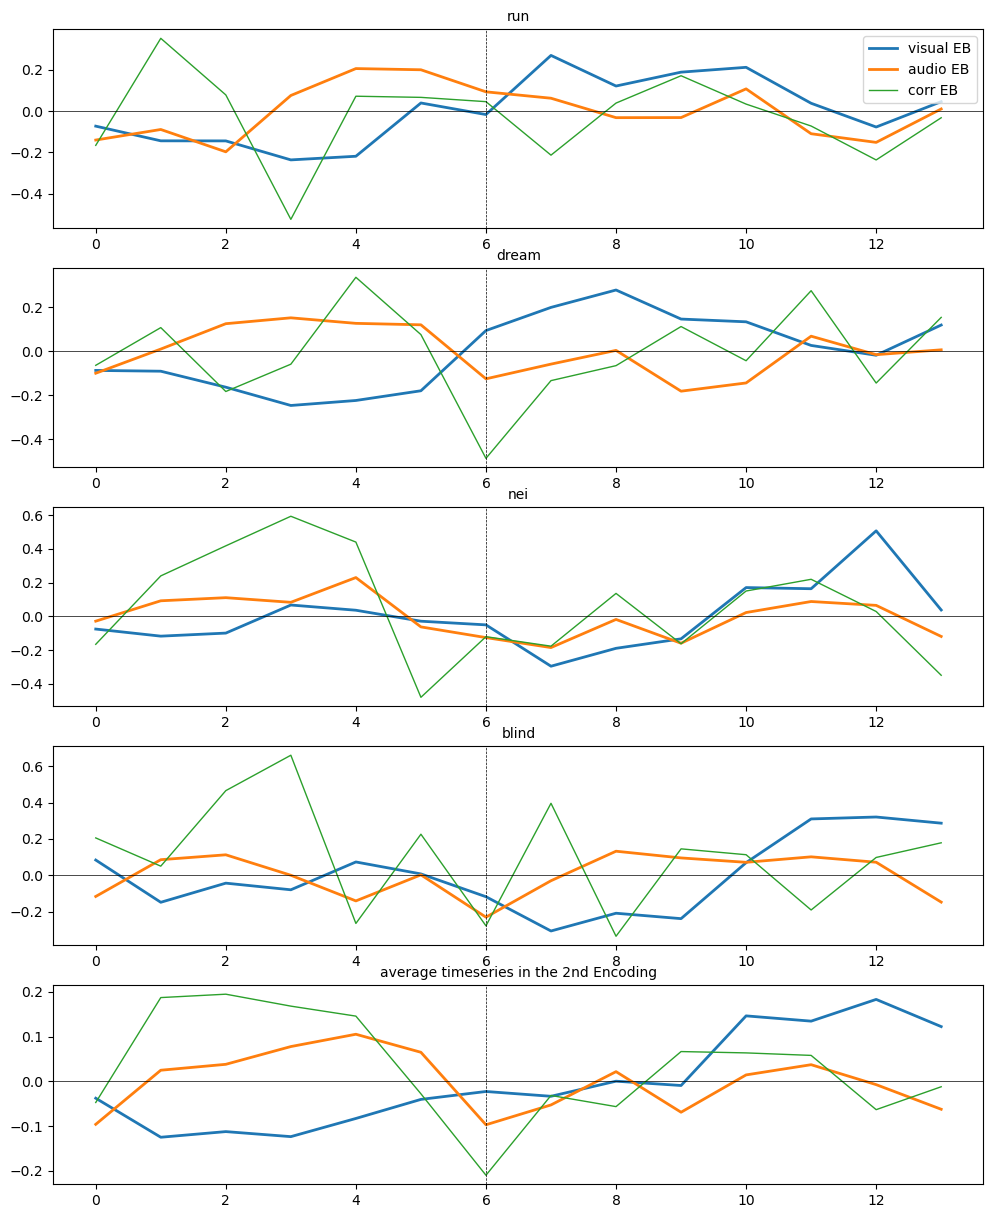

In [46]:
roi = 28

visual_story_mean_series,audio_story_mean_series = find_eventBoundary(roi, 6, 8)
visaul_mean = visual_story_mean_series.mean(axis = 1) 
audio_mean = audio_story_mean_series.mean(axis =1)

#corr_mean_series = find_corr_at_eventBoundary(28,'story_aud', 6, 8)
corr_mean_series = find_corr_at_eventBoundary(roi,'story_vis', 6, 8)

corr_mean = corr_mean_series.mean(axis = 1) 

f,a = plt.subplots(nrows=5, ncols = 1, figsize=(12, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(visual_story_mean_series[story], linewidth=2)
    a[col].plot(audio_story_mean_series[story], linewidth=2)
    a[col].plot(corr_mean_series[story], linewidth=1 )
    a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    #a[col].axvline(x=7, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['visual EB', 'audio EB', 'corr EB'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(visaul_mean, linewidth=2)
a[4].plot(audio_mean, linewidth=2)
a[4].plot(corr_mean, linewidth=1 )
a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries in the 2nd Encoding', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

Text(0.5, 1.0, 'average timeseries in the 2nd Encoding')

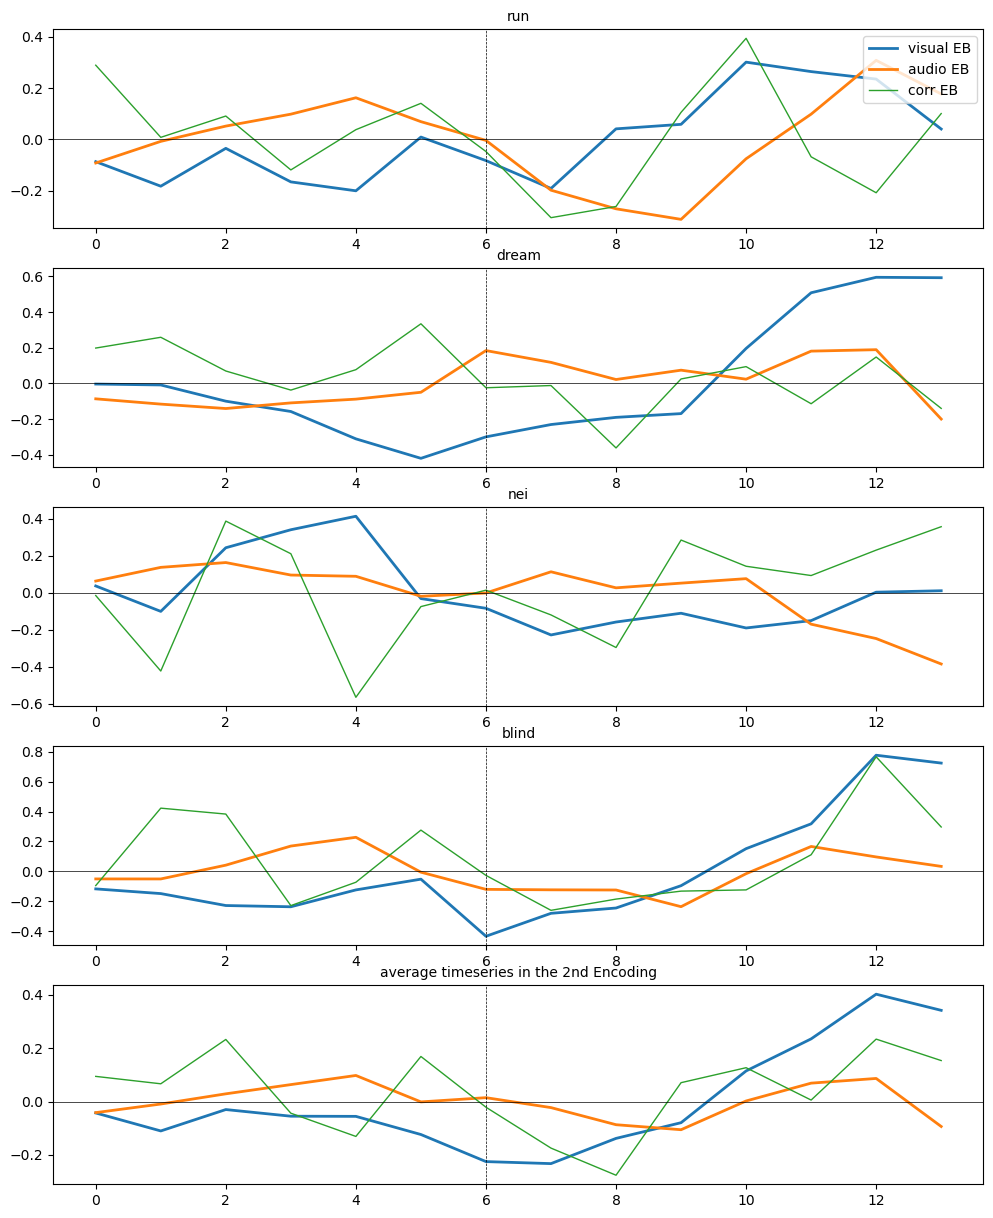

In [64]:
roi = 5


visual_story_mean_series,audio_story_mean_series = find_eventBoundary(roi, 6, 8)
visaul_mean = visual_story_mean_series.mean(axis = 1) 
audio_mean = audio_story_mean_series.mean(axis =1)

#corr_mean_series = find_corr_at_eventBoundary(28,'story_aud', 6, 8)
corr_mean_series = find_corr_at_eventBoundary(roi,'story_vis', 6, 8)

corr_mean = corr_mean_series.mean(axis = 1) 

f,a = plt.subplots(nrows=5, ncols = 1, figsize=(12, 15))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(visual_story_mean_series[story], linewidth=2)
    a[col].plot(audio_story_mean_series[story], linewidth=2)
    a[col].plot(corr_mean_series[story], linewidth=1 )
    a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    #a[col].axvline(x=7, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['visual EB', 'audio EB', 'corr EB'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(visaul_mean, linewidth=2)
a[4].plot(audio_mean, linewidth=2)
a[4].plot(corr_mean, linewidth=1 )
a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries in the 2nd Encoding', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

Text(0.5, 1.0, 'average timeseries of audio EB')

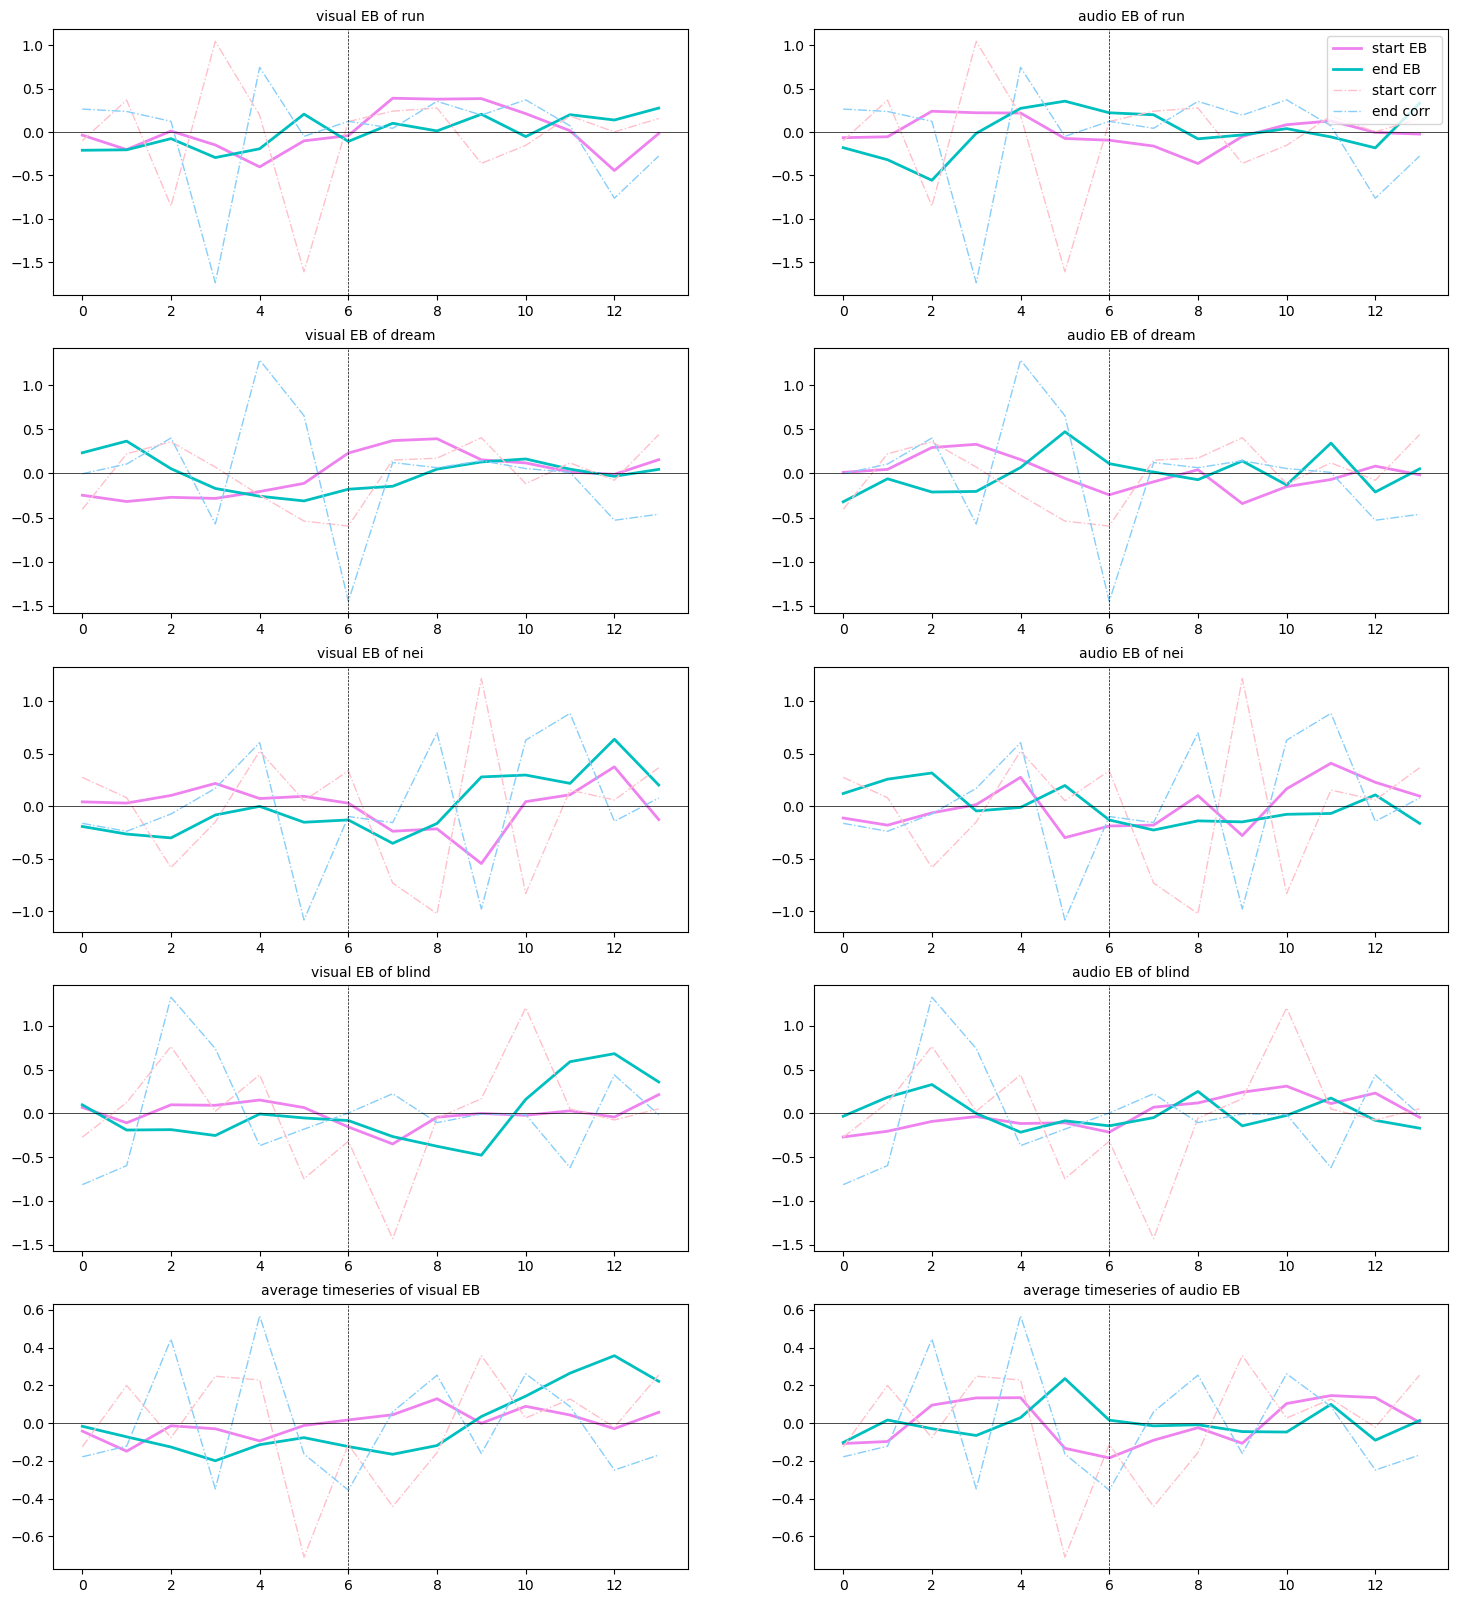

In [47]:
roi = 28

start_vis_mean, start_aud_mean, end_vis_mean, end_aud_mean = compare_startNend_eventBoundary(roi, 6, 8)
start_visaul_mean = start_vis_mean.mean(axis = 1) 
start_audio_mean = start_aud_mean.mean(axis =1)

end_visaul_mean = end_vis_mean.mean(axis = 1) 
end_audio_mean = end_aud_mean.mean(axis =1)

start_corr_mean = find_corr_at_eventBoundary(roi,'start_aud', 6, 8)
end_corr_mean = find_corr_at_eventBoundary(roi,'end_aud', 6, 8)
start_mean = start_corr_mean.mean(axis = 1) 
end_mean = end_corr_mean.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 20))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(start_vis_mean[story], linewidth=2, color = 'violet')
    a[col,0].plot(end_vis_mean[story], linewidth=2, color = 'c')
    a[col,0].plot(start_corr_mean[story], linewidth=1, color = 'pink', linestyle = '-.')
    a[col,0].plot(end_corr_mean[story], linewidth=1, color = 'lightskyblue', linestyle = '-.')
    
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f'visual EB of {story}', fontsize=10)
    
    a[col,1].plot(start_aud_mean[story], linewidth=2, color = 'violet')
    a[col,1].plot(end_aud_mean[story], linewidth=2, color = 'c')
    a[col,1].plot(start_corr_mean[story], linewidth=1, color = 'pink', linestyle = '-.')
    a[col,1].plot(end_corr_mean[story], linewidth=1, color = 'lightskyblue', linestyle = '-.')
    
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[0,1].legend(['start EB', 'end EB', 'start corr', 'end corr'], loc = 'upper right')
    a[col,1].set_title(f'audio EB of {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(start_visaul_mean, linewidth=2, color = 'violet')
a[4,0].plot(end_visaul_mean, linewidth=2, color = 'c')
a[4,0].plot(start_mean, linewidth=1, color = 'pink', linestyle = '-.')
a[4,0].plot(end_mean, linewidth=1, color = 'lightskyblue', linestyle = '-.')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries of visual EB', fontsize=10)

a[4,1].plot(start_audio_mean, linewidth=2, color = 'violet')
a[4,1].plot(end_audio_mean, linewidth=2, color = 'c')
a[4,1].plot(start_mean, linewidth=1, color = 'pink', linestyle = '-.')
a[4,1].plot(end_mean, linewidth=1, color = 'lightskyblue', linestyle = '-.')

a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries of audio EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

Text(0.5, 1.0, 'average timeseries of audio EB')

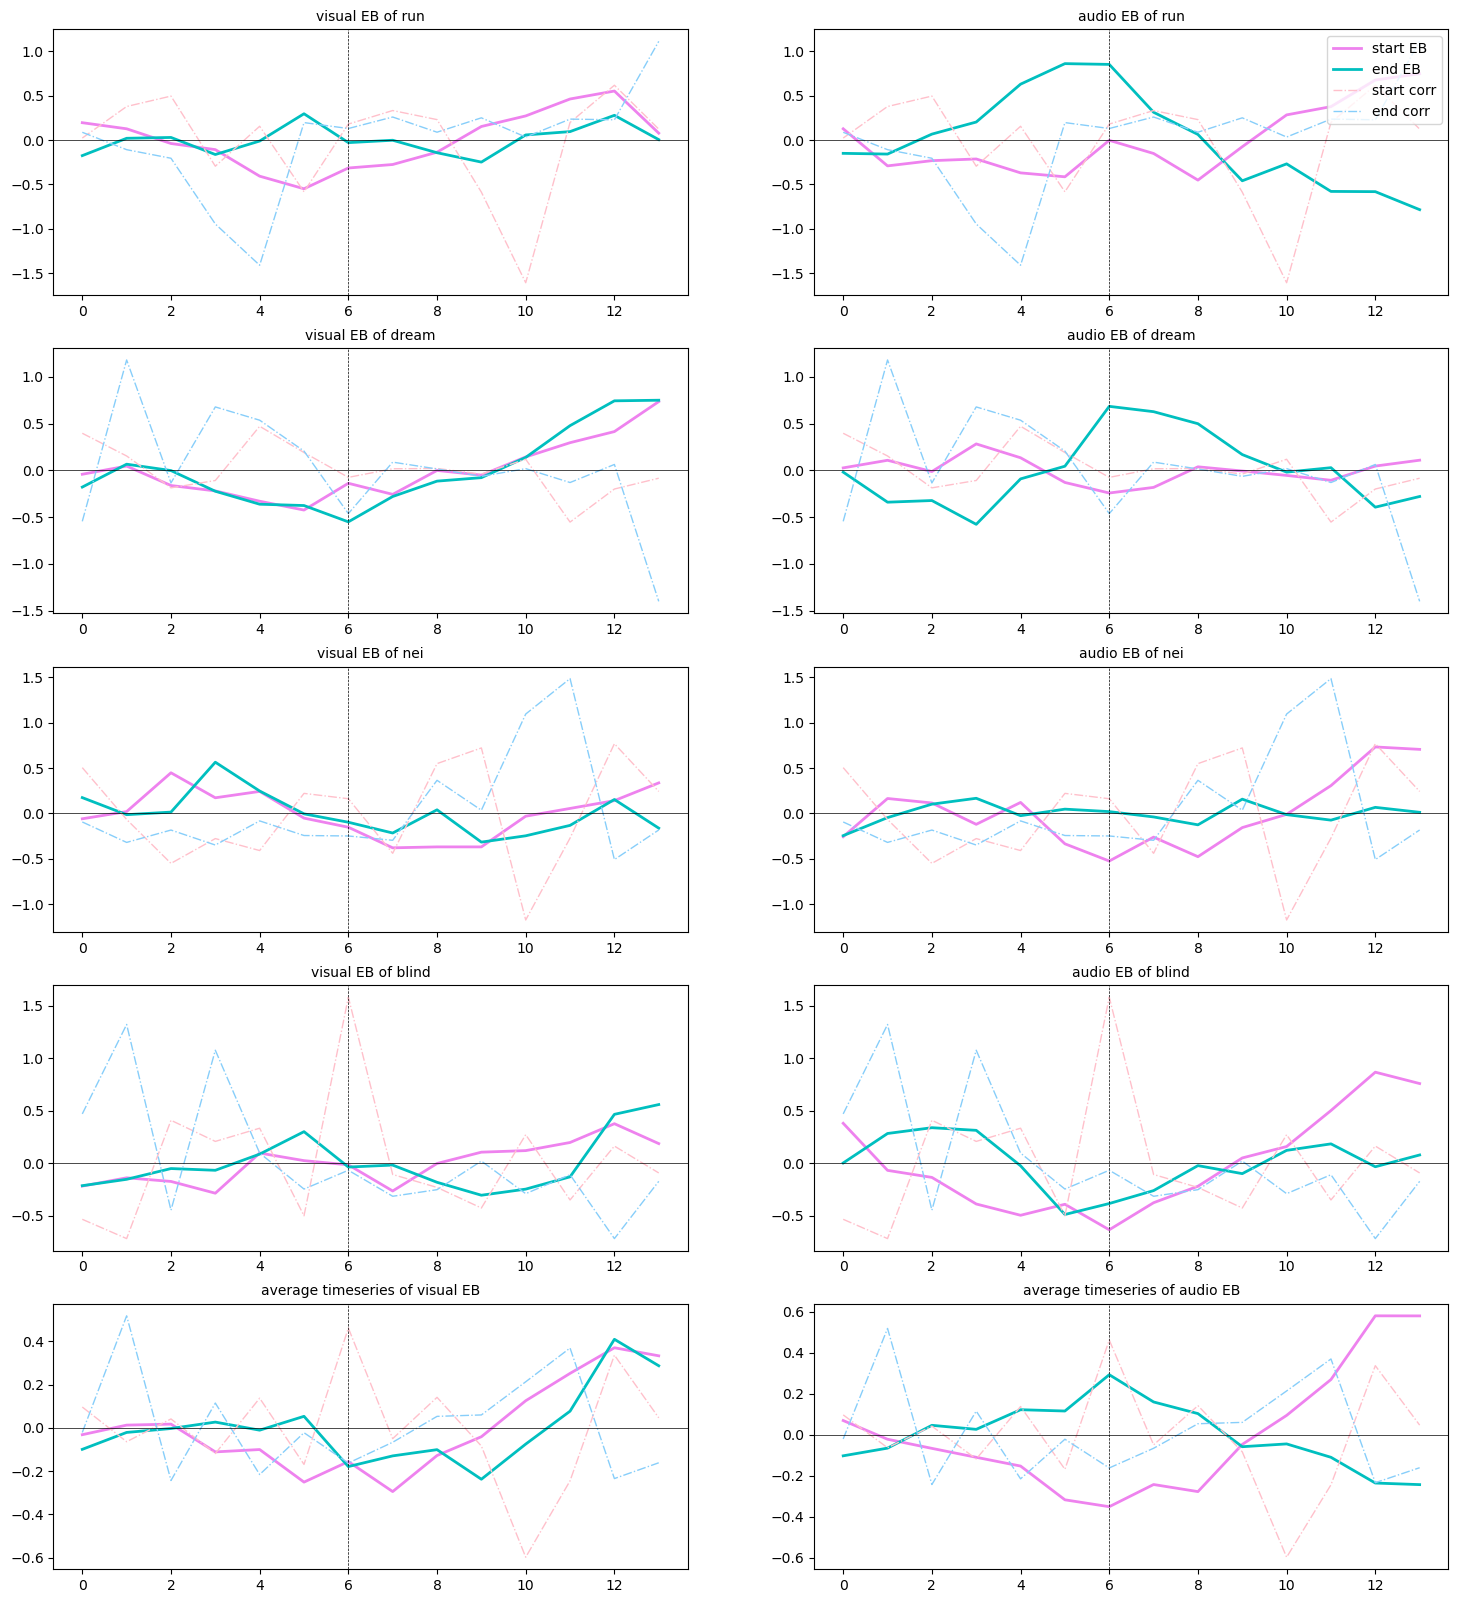

In [48]:
roi = 19

start_vis_mean, start_aud_mean, end_vis_mean, end_aud_mean = compare_startNend_eventBoundary(roi, 6, 8)
start_visaul_mean = start_vis_mean.mean(axis = 1) 
start_audio_mean = start_aud_mean.mean(axis =1)

end_visaul_mean = end_vis_mean.mean(axis = 1) 
end_audio_mean = end_aud_mean.mean(axis =1)

start_corr_mean = find_corr_at_eventBoundary(roi,'start_aud', 6, 8)
end_corr_mean = find_corr_at_eventBoundary(roi,'end_aud', 6, 8)
start_mean = start_corr_mean.mean(axis = 1) 
end_mean = end_corr_mean.mean(axis =1)

f,a = plt.subplots(nrows=5, ncols = 2, figsize=(18, 20))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col,0].plot(start_vis_mean[story], linewidth=2, color = 'violet')
    a[col,0].plot(end_vis_mean[story], linewidth=2, color = 'c')
    a[col,0].plot(start_corr_mean[story], linewidth=1, color = 'pink', linestyle = '-.')
    a[col,0].plot(end_corr_mean[story], linewidth=1, color = 'lightskyblue', linestyle = '-.')
    
    a[col,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col,0].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col,0].set_title(f'visual EB of {story}', fontsize=10)
    
    a[col,1].plot(start_aud_mean[story], linewidth=2, color = 'violet')
    a[col,1].plot(end_aud_mean[story], linewidth=2, color = 'c')
    a[col,1].plot(start_corr_mean[story], linewidth=1, color = 'pink', linestyle = '-.')
    a[col,1].plot(end_corr_mean[story], linewidth=1, color = 'lightskyblue', linestyle = '-.')
    
    a[col,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[0,1].legend(['start EB', 'end EB', 'start corr', 'end corr'], loc = 'upper right')
    a[col,1].set_title(f'audio EB of {story}', fontsize=10)
    a[col,1].axhline(y=0, linewidth = 0.5, color = 'black')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
    
a[4,0].plot(start_visaul_mean, linewidth=2, color = 'violet')
a[4,0].plot(end_visaul_mean, linewidth=2, color = 'c')
a[4,0].plot(start_mean, linewidth=1, color = 'pink', linestyle = '-.')
a[4,0].plot(end_mean, linewidth=1, color = 'lightskyblue', linestyle = '-.')
a[4,0].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,0].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,0].set_title('average timeseries of visual EB', fontsize=10)

a[4,1].plot(start_audio_mean, linewidth=2, color = 'violet')
a[4,1].plot(end_audio_mean, linewidth=2, color = 'c')
a[4,1].plot(start_mean, linewidth=1, color = 'pink', linestyle = '-.')
a[4,1].plot(end_mean, linewidth=1, color = 'lightskyblue', linestyle = '-.')

a[4,1].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4,1].axhline(y=0, linewidth = 0.5, color = 'black')
a[4,1].set_title('average timeseries of audio EB', fontsize=10)

#plt.savefig("EB_activation_Hipp_n50.jpg")

## B.BN atlas

### preprocessing 

In [20]:
#convert files to hdf5 
base_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
denoised_dir = os.path.join(base_dir, 'denoised', 'denoised_2024')
for s in subjects:
    print(s)
    if s < 10:
        file_list = glob.glob(os.path.join(denoised_dir, f'sub-0{s}*_4scNsm.nii.gz'))
    else:
        file_list = glob.glob(os.path.join(denoised_dir, f'sub-{s}*_4scNsm.nii.gz'))
    #print(file_list)
    for f in file_list:
        data = Brain_Data(f)
        data.write(f"{f.split('.nii.gz')[0]}.hdf5")
        print('finish'+f"{f.split('.nii.gz')[0]}.hdf5")

1


KeyboardInterrupt: 

In [160]:
# get each ROI files 
mask_dir = os.path.join(base_dir,'analysis', 'BN_atlas', 'BN_Atlas_246_2mm.nii.gz')
mask = Brain_Data(mask_dir)
mask_x = expand_mask(mask)

denoised_dir = os.path.join(base_dir, 'denoised', 'denoised_2024')
for s in subjects:
    if s < 10:
        file_list = glob.glob(os.path.join(denoised_dir, f'sub-0{s}*_4scNsm.nii.gz'))
    else:
        file_list = glob.glob(os.path.join(denoised_dir, f'sub-{s}*_4scNsm.nii.gz'))
    print(file_list)
    for f in file_list:
        sub = os.path.basename(f).split('_')[0]
        task = os.path.basename(f).split('_')[1]
        run = os.path.basename(f).split('_')[2]
        data = Brain_Data(f)
        roi = data.extract_roi(mask)
        pd.DataFrame(roi.T).to_csv(os.path.join(denoised_dir, 'Averaged_ROI', f'{sub}_{task}_{run}_Average_ROI_n50.csv'), index=False)
        print(f'finish_{sub}_{task}_{run}') 

['/mnt/c/Users/since/Desktop/KdramaMay/denoised/denoised_2024/sub-01_task-encoding_run-1_4scNsm.nii.gz', '/mnt/c/Users/since/Desktop/KdramaMay/denoised/denoised_2024/sub-01_task-encoding_run-2_4scNsm.nii.gz', '/mnt/c/Users/since/Desktop/KdramaMay/denoised/denoised_2024/sub-01_task-recall_run-1_4scNsm.nii.gz', '/mnt/c/Users/since/Desktop/KdramaMay/denoised/denoised_2024/sub-01_task-recall_run-2_4scNsm.nii.gz']


KeyboardInterrupt: 

### start from here

In [21]:
# Data Load & Trimming 

BN_sub_story_timeseries = {}
for sub in subjects:
    story = {} 
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    #print(sequence)
    cond = 'Dream'+str(int(sequence)+1)
    #print(cond)
    denoised_dir = os.path.join(May_dir, 'denoised', 'denoised_2024')
    if sub < 10:
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-2_Average_ROI_n50.csv')) 
    else: 
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-2_Average_ROI_n50.csv'))
    
    for i in np.arange(0,4):
        storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}
        story[storyName[all_story[sub][i]]] = {'visual' : data[onset[cond][i]:offset[cond][i]], 'audio' : data2[onset[cond][i]:offset[cond][i]]}
    
    BN_sub_story_timeseries[sub] = story

In [22]:
# segmentation of timeseries -EB & postEB 
# 1. EB 근처에서 activation increased ? 

from scipy.stats import zscore

def find_eventBoundary_BN(roi, from_onset, from_offset):
    story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
    story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

    visual_story_mean_series, audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(BN_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)

        visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
        audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
    #visaul_mean = visual_story_mean_series.mean(axis = 1)
    #audio_mean = audio_story_mean_series.mean(axis =1)
    return visual_story_mean_series, audio_story_mean_series

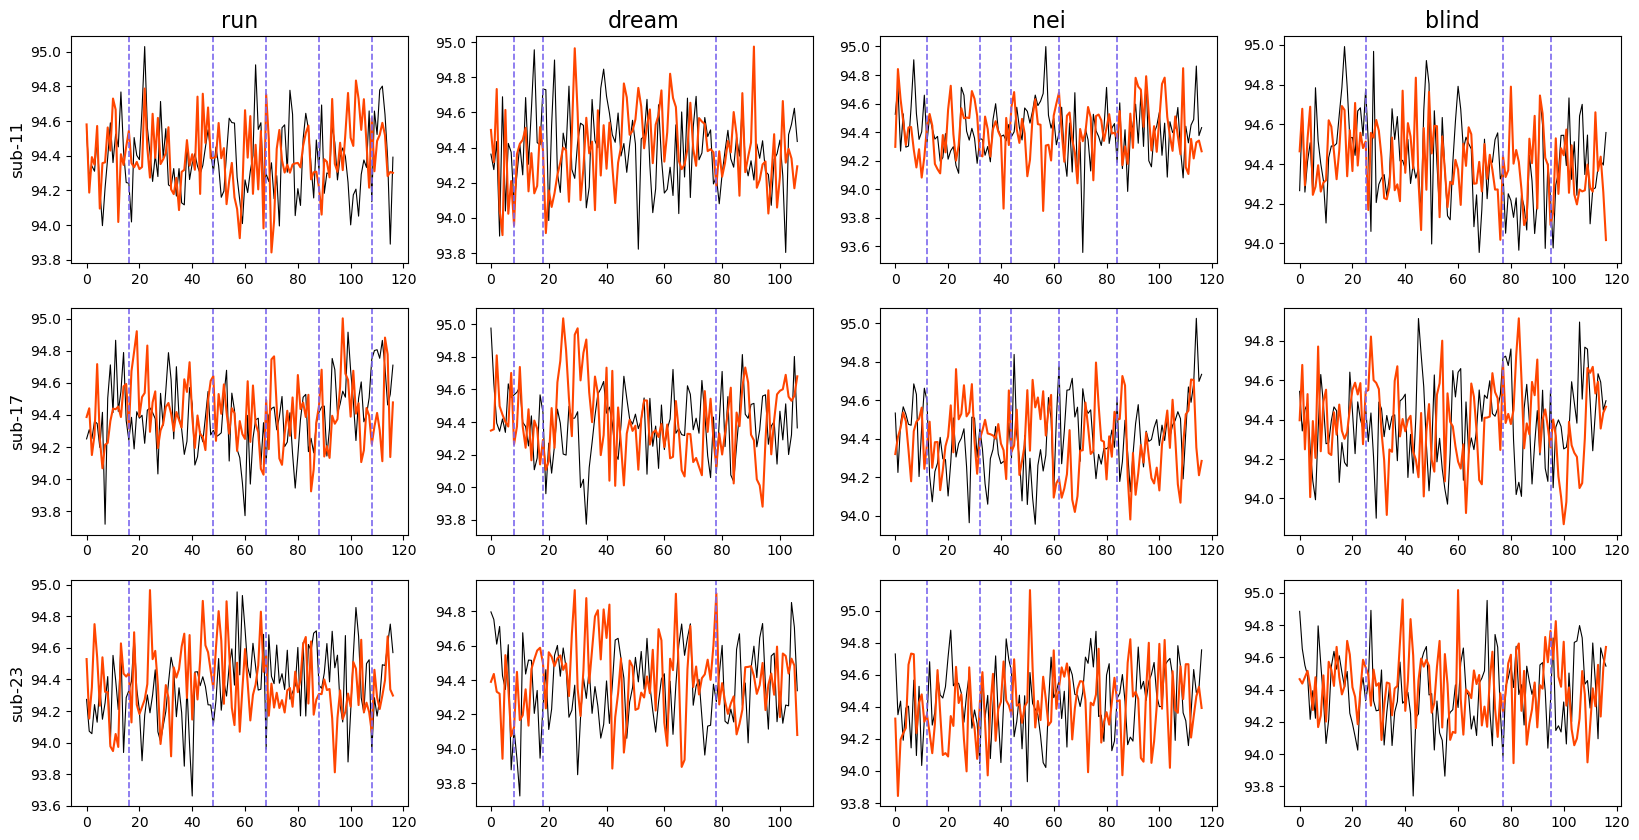

In [32]:
f,a = plt.subplots(nrows=3, ncols = 4, figsize=(20, 10))#,sharey=True)
roi = 218

story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

for row, sub in enumerate([11, 17, 23]):
    for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
        vis_timeseries, aud_timeseries = get_story_roi(BN_sub_story_timeseries, story, roi, sub) 
        diff_timeseries = aud_timeseries - vis_timeseries
        a[row, col].plot(vis_timeseries, linewidth=0.8, color = 'black')#, linestyle= '--')
        a[row, col].plot(aud_timeseries, linewidth=1.5, color = 'orangered')
        #a[row, col].plot(diff_timeseries, linewidth=1, color = 'green')
        a[0, col].set_title(f'{story}', fontsize=16)
        a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)
        for idx, line in enumerate(story_EB_audio[story]):
            a[row, col].axvline(x=line, ymin=0, ymax=1, linewidth = 1.2, color='mediumslateblue', linestyle='--')

In [23]:
# Compare behav and ROI 
# 5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
def plot_comparison_BN(roi, cond, eb):
    window_size = 2

    story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
    story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}
    
    f,a = plt.subplots(nrows=3, ncols = 4, figsize=(16, 7))#,sharey=True)
    for row, sub in enumerate([11, 17, 23]):
        for col, story in enumerate(['run', 'dream', 'nei', 'blind']):

            vis_timeseries, aud_timeseries = get_story_roi(BN_sub_story_timeseries, story, roi, sub) 
            diff_timeseries = aud_timeseries - vis_timeseries
            timeseries_smooth = aud_timeseries.rolling(window=window_size).mean() #smoothing 
            
            if cond == 'visual':
                eventBoundary = story_EB_visual
                timeseries = vis_timeseries
            elif cond == 'audio': 
                eventBoundary = story_EB_audio
                timeseries = aud_timeseries
            elif cond == 'diff':
                eventBoundary = story_EB_audio
                timeseries = diff_timeseries

            a[row, col].plot(timecourse(sub, story), linewidth=1.5, color = 'black') #behav
            a[row, col].plot(timeseries, linewidth = 1, color = 'lightseagreen')


            a[0, col].set_title(f'{story}', fontsize=16)
            a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)
            if eb == 1:
                for idx, line in enumerate(eventBoundary[story]):
                    a[row, col].axvline(x=line, ymin=0, ymax=1, linewidth = 1.2, color='mediumslateblue', linestyle='--')

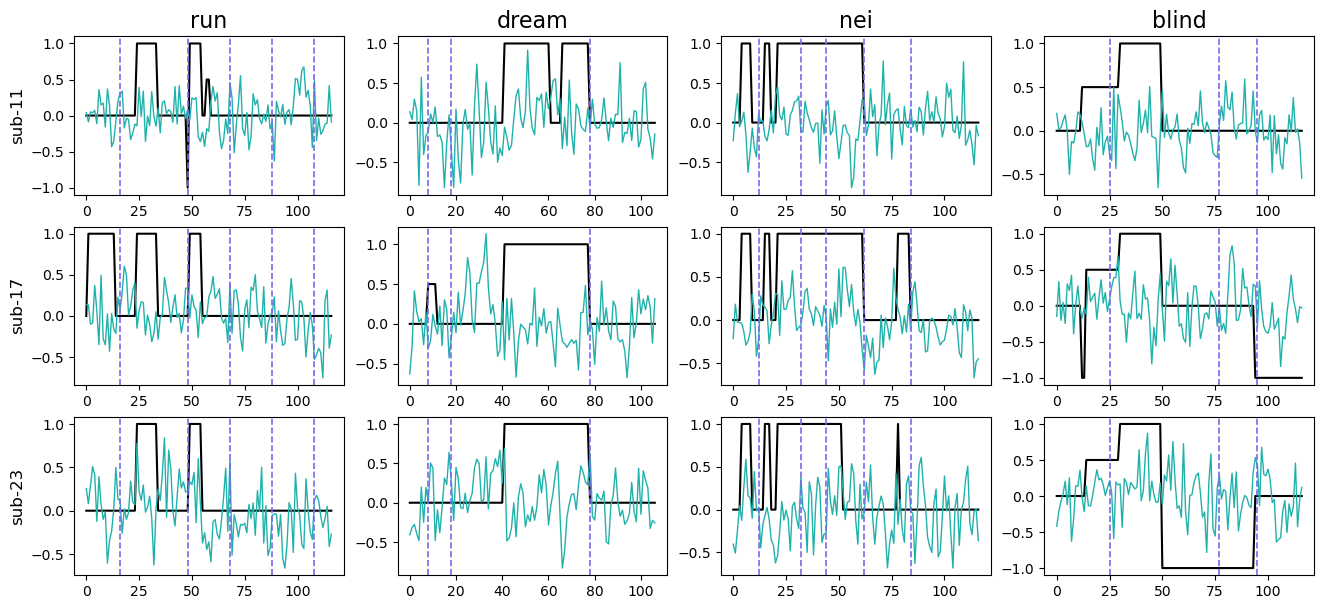

In [24]:
# ROI: 216 - anterior HPC (left) ; 217 - anterior HPC (right) ; 218 - posterior HPC (left) ; 219 -posterior HPC (right) 
# Cond: visual/audio/diff
# eb: 1 == yes, 0 == no 
plot_comparison_BN(218, 'diff', 1)

In [25]:
# segmentation of timeseries -EB & postEB 
# 1. EB 근처에서 activation increased ? 

from scipy.stats import zscore

def find_eventBoundary_(roi, from_onset, from_offset):
    story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
    story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

    visual_story_mean_series, audio_story_mean_series = pd.DataFrame(), pd.DataFrame()
    for story in ['run', 'dream', 'nei', 'blind']:
        visual_sum_seg, audio_sum_seg = pd.DataFrame(), pd.DataFrame()
        for sub in subjects: 
            visual_data, audio_data = get_story_roi(BN_sub_story_timeseries, story, roi, sub)
        #segmentation of HPC : -2~15TR 
            visual_segment,audio_segment  = pd.DataFrame(), pd.DataFrame()
            for idx, num in enumerate(story_EB_visual[story]):
                onset = num - from_onset
                offset = num + from_offset
                #series = 
                visual_segment[idx] = visual_data[onset:offset].reset_index(drop=True) 
            visual_sum_seg[sub] =visual_segment.apply(zscore).mean(axis=1)

            for idx, num in enumerate(story_EB_audio[story]):
                onset = num - from_onset 
                offset = num + from_offset
                audio_segment[idx] = audio_data[onset:offset].reset_index(drop=True)
            audio_sum_seg[sub] = audio_segment.apply(zscore).mean(axis=1)

        visual_story_mean_series[story] = visual_sum_seg.mean(axis = 1)
        audio_story_mean_series[story] = audio_sum_seg.mean(axis = 1)
    #visaul_mean = visual_story_mean_series.mean(axis = 1)
    #audio_mean = audio_story_mean_series.mean(axis =1)
    return visual_story_mean_series, audio_story_mean_series

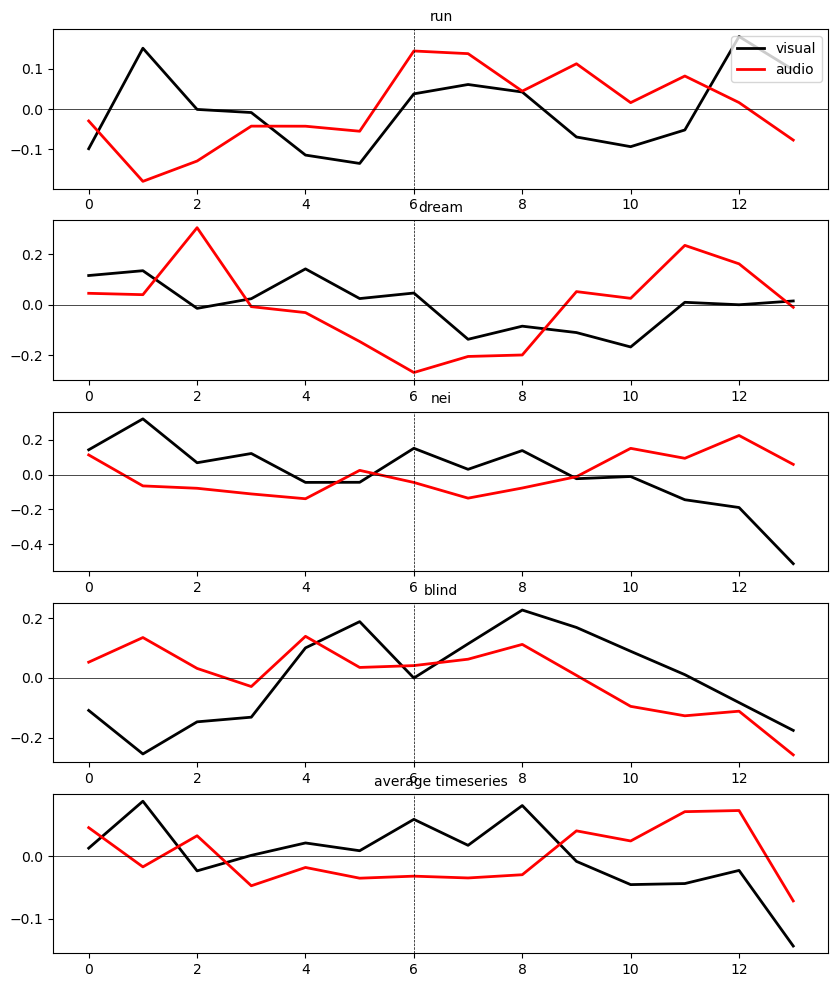

In [36]:
visual_story_mean_series,audio_story_mean_series = find_eventBoundary_(218, 6, 8)
visaul_mean = visual_story_mean_series.mean(axis = 1)
audio_mean = audio_story_mean_series.mean(axis =1)


f,a = plt.subplots(nrows=5, ncols = 1, figsize=(10, 12))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(visual_story_mean_series[story], linewidth=2, color = 'black')
    a[col].plot(audio_story_mean_series[story], linewidth=2, color = 'red')
    a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    #a[col].axvline(x=7, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['visual', 'audio'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(visaul_mean, linewidth=2, color = 'black')
a[4].plot(audio_mean, linewidth=2, color = 'red')
a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries', fontsize=10)

#plt.savefig("right_posterior_hipp.jpg")

## C. STW analysis

### Computations

In [176]:
# Inter condition differences : 시간대별로 참가자의 두 컨디션 간 difference를 구간 별로 평균을 낸 값이다... 평균,,, 

import pandas as pd
from tqdm import tqdm

#roi =28 
# 슬라이딩 타임 윈도우 크기 및 간격 설정
window_size = 30 #TR - 45secs 
stride = 1  # 윈도우 이동 간격 (TR 단위)
All_subtract_means = {}
for roi in tqdm([5,6,19,28,32]):
    subSTW_mean= {}
    for sub in subjects: 
        storySTW_mean = {}
        for story in ['run', 'dream', 'nei', 'blind']:
            vis_timeseries, aud_timeseries = get_story_roi(sub_story_timeseries, story, roi, sub) 
            data = aud_timeseries - vis_timeseries
            
            subtract_mean = []
            for i in range(0, data.shape[0] - window_size + 1, stride):
                window = data.iloc[i:i + window_size]
                result = pd.DataFrame(window).mean()
                subtract_mean.append(result)
            storySTW_mean[story] = pd.Series(subtract_mean, index=data.index[window_size - 1:])
        subSTW_mean[sub] = storySTW_mean
    All_subtract_means[roi] = subSTW_mean

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.75s/it]


In [328]:
All_subtract_means[5][11]['run'][29]

5    0.050158
dtype: float64

In [385]:
# Inter condition correlation 
All_sliding_r = {}
for roi in tqdm([5,6, 19,28,32]):
    sub_sliding_r = {}
    for sub in [11, 17, 23]:
        sliding_r = {}
        for story in ['run', 'dream', 'nei', 'blind']:
            data = get_story_roi_(sub_story_timeseries, story, roi, sub)
            window_isc_r = []
            for i in range(0, data.shape[0] - window_size + 1, stride):
                window = data.iloc[i:i + window_size]
                stats = isc(window, n_bootstraps=5000, metric='median', method='bootstrap', exclude_self_corr=True) #Same Subject multiple repeat option : exclude_self_corr=True
                window_isc_r.append(stats['isc'])
            result_r = pd.Series(window_isc_r, index=data.index[window_size - 1:])   
            sliding_r[story] = result_r
        sub_sliding_r[sub] = sliding_r
    All_sliding_r[roi] = sub_sliding_r

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [1:03:54<00:00, 766.94s/it]
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/sincerely/.co

### Plotting

In [306]:
# Compare behav and ROI 
# 5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
def plot_stw(roi, cond, eb):
    window_size = 2

    story_EB_visual = {'run':[14,18,34,38,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
    story_EB_audio = {'run':[16,39,48,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}
    
    f,a = plt.subplots(nrows=3, ncols = 4, figsize=(16, 7))#,sharey=True)
    for row, sub in enumerate([11, 17, 23]):
        for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
            
            if cond == 'subtract':
                eventBoundary = story_EB_audio
                stw_timeseries = All_subtract_means[roi][sub][story]
                y_values = stw_timeseries[29][0]
            elif cond == 'corr': 
                eventBoundary = story_EB_audio
                stw_timeseries = All_sliding_r[roi][sub][story]
                y_values = stw_timeseries[29]

            a[row, col].plot(timecourse(sub, story), linewidth=1.5, color = 'black') #behav
            a[row, col].plot(stw_timeseries, linewidth = 1, color = 'lightseagreen')
            
            if story == 'dream':
                a[row, col].axhline(y=y_values, xmin=0.05, xmax=31/106, linewidth = 1, color='lightseagreen', linestyle='solid')
            else:
                a[row, col].axhline(y=y_values, xmin=0.05, xmax=31/116, linewidth = 1, color='lightseagreen', linestyle='solid')


            a[0, col].set_title(f'{story}', fontsize=16)
            a[row,0].set_ylabel(f'sub-{sub}', fontsize=12)
            if eb == 1:
                for idx, line in enumerate(eventBoundary[story]):
                    a[row, col].axvline(x=line, ymin=0, ymax=1, linewidth = 1.2, color='mediumslateblue', linestyle='--')

NameError: name 'All_sliding_r' is not defined

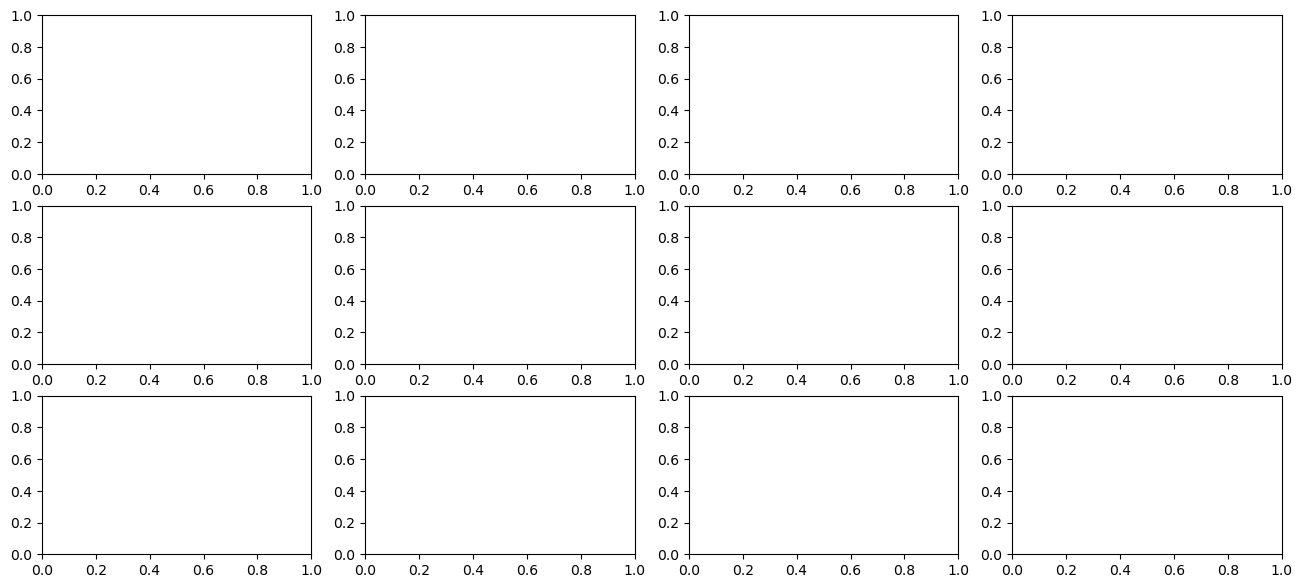

In [307]:
# ROI: 5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
# Cond: subtract/corr
# eb: 1 == yes, 0 == no 
plot_stw(19, 'corr', 1)

# 3. Comparision neural activation at the Updating points

## A. Averaged Updating Patterns across participants 

### Load behavior rating 

In [238]:
# directory for behav
base_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
ec_counting = '/mnt/c/Users/since/Dropbox/jany/'

col_sm = np.arange(2,35)
col_sm_exclude = [8,25] # sub 10, 26 excluded
cols = np.delete(col_sm, col_sm_exclude) 
#print(cols)
#print(len(cols))

run_ec= pd.read_excel(os.path.join(ec_counting,'Event_counting.xlsx'), sheet_name = 'Run_2', usecols = cols)
dre_ec= pd.read_excel(os.path.join(ec_counting,'Event_counting.xlsx'), sheet_name = 'Dre_2', usecols = cols)
nei_ec= pd.read_excel(os.path.join(ec_counting,'Event_counting.xlsx'), sheet_name = 'Nei_2', usecols = cols)
bli_ec= pd.read_excel(os.path.join(ec_counting,'Event_counting.xlsx'), sheet_name = 'Bli_2', usecols = cols)

#chage NAN to 0 
run_ec = run_ec.fillna(0)
dre_ec = dre_ec.fillna(0)
nei_ec = nei_ec.fillna(0)
bli_ec = bli_ec.fillna(0)

In [239]:
# Define Event Counting vectors  < -- ㅇㅕㄱㅣ ㅇㅣㅅㅏㅇㅎㅐ 
vis_run_ec = run_ec[0:13].reset_index(drop=True)
aud_run_ec = run_ec[13:26].reset_index(drop=True)

vis_dre_ec = dre_ec[0:10].reset_index(drop=True)
aud_dre_ec = dre_ec[10:20].reset_index(drop=True)

vis_nei_ec = nei_ec[0:16].reset_index(drop=True)
aud_nei_ec = nei_ec[16:32].reset_index(drop=True)

vis_bli_ec = bli_ec[0:11].reset_index(drop=True)
aud_bli_ec = bli_ec[11:22].reset_index(drop=True)

# Define Updating vectors 
update_run_ec = run_ec[26:39].reset_index(drop=True)
update_dre_ec = dre_ec[20:30].reset_index(drop=True)
update_nei_ec = nei_ec[32:48].reset_index(drop=True)
update_bli_ec = bli_ec[22:33].reset_index(drop=True)

# Define condition variables
visual_stroy_ec = {'run' : vis_run_ec, 'dream': vis_dre_ec, 'nei': vis_nei_ec, 'blind': vis_bli_ec}
audio_stroy_ec = {'run' : aud_run_ec, 'dream': aud_dre_ec, 'nei': aud_nei_ec, 'blind': aud_bli_ec}
update_stroy_ec = {'run' : update_run_ed, 'dream': update_dre_ec, 'nei': update_nei_ec, 'blind': update_bli_ec}

In [240]:
vis_avg_ec, aud_avg_ec, update_avg_ec = {}, {}, {}
for story in ['run', 'dream', 'nei', 'blind']:
    vis_ec = visual_stroy_ec[story]
    aud_ec = audio_stroy_ec[story] 
    update_ec = update_stroy_ec[story] 
    
    vis_avg_ec[story] = vis_ec.assign(mean=vis_ec.mean(axis=1))
    aud_avg_ec[story] = aud_ec.assign(mean=aud_ec.mean(axis=1))
    update_avg_ec[story] = update_ec.assign(mean=update_ec.mean(axis=1))
    
cond_story_ec = {'vis' : vis_avg_ec, 'aud': aud_avg_ec, 'update': update_avg_ec} 

In [241]:
eventTime = {'run':[11,24,26,28,34,44,58,59,65,67,69,99,107], 'dream':[11, 16, 18, 22, 35, 51, 71, 76, 88, 100], 'nei': [11,14,19, 22,25,28,31,34,38,42,62,72,88,89,94,110], 'blind': [11,13,22,24,28,40,43,56,60,104]}

Alltimeseries = {} 
for cond in ['vis', 'aud', 'update'] : 
    story_timeseries = {} 
    for story in ['run', 'dream', 'nei', 'blind']:
        time = eventTime[story]
        if story == 'dream':
            timeseries = np.zeros(107)
            end_point = 107
        else:
            timeseries = np.zeros(117) 
            end_point = 117
        for idx, timePoint in enumerate(time):
            if idx == len(time)-1:
                offset = end_point
            else:
                offset = time[idx+1]
            timeseries[timePoint:offset] = cond_story_ec[cond][story]['mean'][idx]
        story_timeseries[story] = timeseries
    Alltimeseries[cond] = story_timeseries 

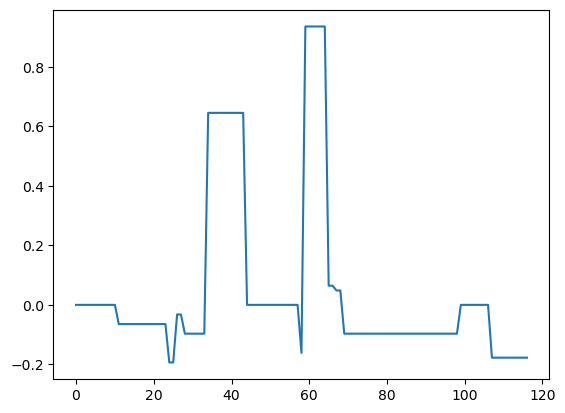

In [494]:
plt.plot(Alltimeseries['update']['run'])

## B. Sement and average neural patterns based on updating points 

In [243]:
# load location which is more than 0.5 
cond_timePoint, no_cond_timePoint = {}, {}
for cond in ['vis', 'aud', 'update'] : 
    story_timePoint, no_update_timePoint = {}, {}
    for story in ['run', 'dream', 'nei', 'blind']:
        df = pd.DataFrame(Alltimeseries[cond][story], columns = ['mean'])
        index = df[df['mean'] >= 0.5].index
        index2 = df[df['mean'] < 0.5].index
        story_timePoint[story] = index
        no_update_timePoint[story] = index2 
    cond_timePoint[cond] = story_timePoint
    no_cond_timePoint[cond] = no_update_timePoint

In [492]:
for story in ['run', 'dream', 'nei', 'blind']:
    print(story, cond_timePoint['update'][story])

run Int64Index([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 59, 60, 61, 62, 63, 64], dtype='int64')
dream Int64Index([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87],
           dtype='int64')
nei Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
           dtype='int64')
blind Int64Index([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
            57, 58, 59],
           dtype='int64')


In [543]:
story_EB_visual_60 = {'run':[18,38,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
story_EB_audio_60 = {'run':[16, 38,46,88], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

story_EB_visual_80 = {'run':[19,88], 'dream':[7], 'nei':[64,84], 'blind':[]}
story_EB_audio_80 = {'run':[16,88], 'dream':[7,18], 'nei':[84], 'blind':[78,94]}

common_EB = {'run' : [16, 48, 88], 'dream':[6, 18, 78], 'nei':[62,84], 'blind':[95]}



run_update_point = {1 : [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 2: [59, 60, 61, 62, 63, 64]}
dream_update_point = {1:[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]}
nei_update_point = {1:[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]}
bli_update_point = {1: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}

SyntaxError: unexpected EOF while parsing (3858273481.py, line 14)

In [244]:
def get_story_roi(data, story, roi, sub):
    visual_story_roi = data[sub][story]['visual'].iloc[:, roi].reset_index(drop=True)
    audio_story_roi = data[sub][story]['audio'].iloc[:, roi].reset_index(drop=True)
    return pd.DataFrame(visual_story_roi), pd.DataFrame(audio_story_roi)

### Average activation of update 

In [489]:
# average scene activations 
Update_timepoints = cond_timePoint['update'] 
no_update_timepoints = no_cond_timePoint['update'] 

roi = 28
update_story_mean, no_update_story_mean ={}, {}
for story in ['run', 'dream', 'nei', 'blind']:
    #update_mean, no_update_mean = pd.DataFrame(), pd.DataFrame()
    update_mean, no_update_mean = [], []
    for sub in subjects:
        vis, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        sum_update_scenes, sum_no_update_scenes = [], [] 
        for idx, num in enumerate(Update_timepoints[story]):
            
            if story == 'dream':
                if num > 104:
                    margin = 106 - num 
                else:
                    margin = 1 
            else:
                if num > 114:
                    margin = 116 - num 
                else: 
                    margin = 1 
                    
                #sum_update_scenes.append( audio_data.iloc[num+4].values)
            sum_update_scenes.append( audio_data.iloc[(num + margin)].values)
        update_mean.append(np.array(sum_update_scenes).mean()) 

        
        for idx, num in enumerate(no_update_timepoints[story]):
            if story == 'dream':
                if num > 104:
                    margin = 106 - num 
                else:
                    margin = 1 
            else:
                if num > 114:
                    margin = 116 - num 
                else: 
                    margin = 1 
                    
            sum_no_update_scenes.append( audio_data.iloc[num+margin].values)
        no_update_mean.append(np.array(sum_no_update_scenes).mean()) 
        
    update_story_mean[story] = pd.DataFrame(update_mean).apply(zscore).mean(axis=0)
    no_update_story_mean[story] = pd.DataFrame(no_update_mean).apply(zscore).mean(axis=0)

In [490]:
update

run         dream           nei         blind          mean
0  0.000000e+00  1.110223e-16 -6.938894e-18  2.775558e-17  3.295975e-17
1 -1.387779e-17  4.857226e-17 -3.469447e-17  0.000000e+00  0.000000e+00

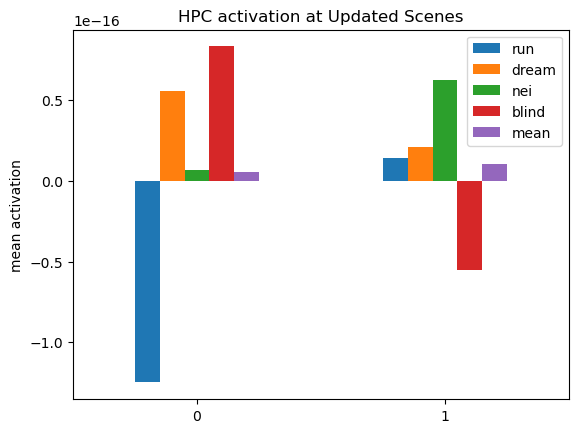

In [491]:
yes_update = pd.DataFrame(update_story_mean)
yes_update['mean'] = yes_update.mean(axis=1)
no_update = pd.DataFrame(no_update_story_mean)
no_update['mean'] = no_update.mean(axis=1)
update = pd.concat([yes_update, no_update]).reset_index(drop=True)

#fig, ax = plt.subplots()

ax = update.plot.bar(rot=0)

ax.set_ylabel('mean activation')
ax.set_title('HPC activation at Updated Scenes')

plt.show()


In [519]:
# Before updating/ update/ After updating 
story_EB_audio_60 = {'run':[16, 38,46,88], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}
common_EB = {'run' : [16, 48, 88], 'dream':[6, 18, 78], 'nei':[62,84], 'blind':[95]}
story_EB_audio_80 = {'run':[16,88], 'dream':[7,18], 'nei':[84], 'blind':[78,94]}


run_update_point = {1 : [39, 40, 41, 42, 43, 59, 60, 61, 62, 63, 64]} #46
run_before_update = range(11,34) 
run_after_update = range(65,117) 

dream_update_point = [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87] #78 
dream_before_update = range(11,51)
dream_after_update = range(88,107)

nei_update_point = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71] #62
nei_before_update = range(11,42) 
nei_after_update = range(72,117) 

bli_update_point = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
bli_before_update = range(11,40) 
bli_after_update = range(60,117) 

before_update = {'run':run_before_update, 'dream':dream_before_update, 'nei': nei_before_update, 'blind':bli_before_update}
after_update = {'run':run_after_update, 'dream':dream_after_update, 'nei': nei_after_update, 'blind':bli_after_update}
update_points = {'run':run_update_point, 'dream':dream_update_point, 'nei': nei_update_point, 'blind':bli_update_point}

### Compare yes-update and no-update

In [541]:
Update_timepoints = cond_timePoint['aud'] 
no_update_timepoints = no_cond_timePoint['aud'] 

roi = 28
update_story_mean, no_update_story_mean =pd.DataFrame(), pd.DataFrame()
for story in ['run', 'dream', 'nei', 'blind']:
    update_sum, no_update_sum = pd.DataFrame(), pd.DataFrame()
    for sub in subjects:
        vis, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        
        update_scenes, no_update_scenes  = pd.DataFrame(), pd.DataFrame()
        for idx, num in enumerate(Update_timepoints[story]):
            onset = num-6
            offset = num+8
            #print(onset, offset)
            update_scenes[idx] = audio_data[onset:offset].reset_index(drop=True)
        
        for idx, num in enumerate(no_update_timepoints[story]):
            onset = num-6
            offset = num+8
            no_update_scenes[idx] = audio_data[onset:offset].reset_index(drop=True)
            
        update_sum[sub] = pd.DataFrame(update_scenes).apply(zscore).mean(axis=1)
        no_update_sum[sub] = pd.DataFrame(no_update_scenes).apply(zscore).mean(axis=1)
    update_story_mean[story] = update_sum.mean(axis = 1)
    no_update_story_mean[story] = no_update_sum.mean(axis = 1)
yes_update = update_story_mean.mean(axis=1)
No_update = no_update_story_mean.mean(axis=1)

Text(0.5, 1.0, 'average timeseries')

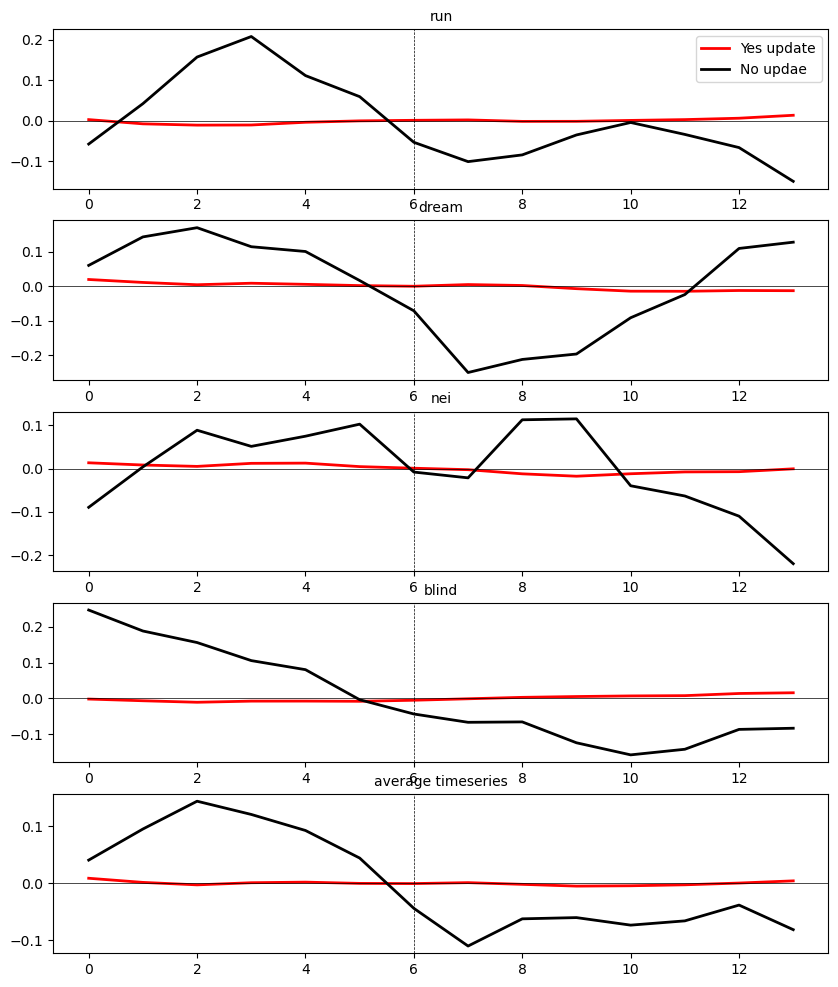

In [542]:
f,a = plt.subplots(nrows=5, ncols = 1, figsize=(10, 12))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(update_story_mean[story], linewidth=2, color = 'red')
    a[col].plot(no_update_story_mean[story], linewidth=2, color = 'black')
    a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['Yes update', 'No updae'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(yes_update, linewidth=2, color = 'red')
a[4].plot(No_update, linewidth=2, color = 'black')
a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries', fontsize=10)

### Compare before/after/update

In [519]:
# Before updating/ update/ After updating 
story_EB_audio_60 = {'run':[16, 38,46,88], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}
common_EB = {'run' : [16, 48, 88], 'dream':[6, 18, 78], 'nei':[62,84], 'blind':[95]}
story_EB_audio_80 = {'run':[16,88], 'dream':[7,18], 'nei':[84], 'blind':[78,94]}

run_start = range(0,16) 
dream_start = range(0,18) 
nei_start = range(0,12) 
bli_start = range(0,25)

start = {'run':run_start, 'dream':dream_start, 'nei': nei_start, 'blind':bli_start}




run_update_point = {1 : [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 59, 60, 61, 62, 63, 64]} #46
run_before_update = range(11,34) 
run_after_update = range(65,117) 

dream_update_point = [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87] #78 
dream_before_update = range(11,51)
dream_after_update = range(88,107)

nei_update_point = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71] #62
nei_before_update = range(11,42) 
nei_after_update = range(72,117) 

bli_update_point = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
bli_before_update = range(11,40) 
bli_after_update = range(60,117) 

before_update = {'run':run_before_update, 'dream':dream_before_update, 'nei': nei_before_update, 'blind':bli_before_update}
after_update = {'run':run_after_update, 'dream':dream_after_update, 'nei': nei_after_update, 'blind':bli_after_update}
update_points = {'run':run_update_point, 'dream':dream_update_point, 'nei': nei_update_point, 'blind':bli_update_point}

In [551]:
roi = 19
update_story_mean, before_update_story_mean, after_update_story_mean =pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for story in ['run', 'dream', 'nei', 'blind']:
    update_sum, before_update_sum, after_update_sum = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for sub in subjects:
        vis, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        
        update_scenes, before_update_scenes, after_update_scenes  = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        for idx, num in enumerate(Update_timepoints[story]):
            if num > 110:
                if story == 'dream':
                    margin = 106-num 
                else:
                    margin = 116-num  
                offset = num+margin
            else: offset = num+6
            #print(onset, offset)
            update_scenes[idx] = audio_data[num:offset].reset_index(drop=True)
        
        for idx, num in enumerate(before_update[story]):
            if num > 110:
                if story == 'dream':
                    margin = 106-num 
                else:
                    margin = 116-num  
                offset = num+margin
            else: offset = num+6
            before_update_scenes[idx] = audio_data[num:offset].reset_index(drop=True)
        
        for idx, num in enumerate(after_update[story]):
            if num > 110:
                if story == 'dream':
                    margin = 106-num 
                else:
                    margin = 116-num  
                offset = num+margin
            else: offset = num+6
            after_update_scenes[idx] = audio_data[num:offset].reset_index(drop=True)
            
        update_sum[sub] = pd.DataFrame(update_scenes).apply(zscore).mean(axis=1)
        before_update_sum[sub] = pd.DataFrame(before_update_scenes).apply(zscore).mean(axis=1)
        after_update_sum[sub] = pd.DataFrame(after_update_scenes).apply(zscore).mean(axis=1)
    update_story_mean[story] = update_sum.mean(axis = 1)
    before_update_story_mean[story] = before_update_sum.mean(axis = 1)
    after_update_story_mean[story] = after_update_sum.mean(axis = 1)
update_mean = update_story_mean.mean(axis=1)
before_update_mean = before_update_story_mean.mean(axis=1)
after_update_mean = after_update_story_mean.mean(axis=1)

Text(0.5, 1.0, 'average timeseries')

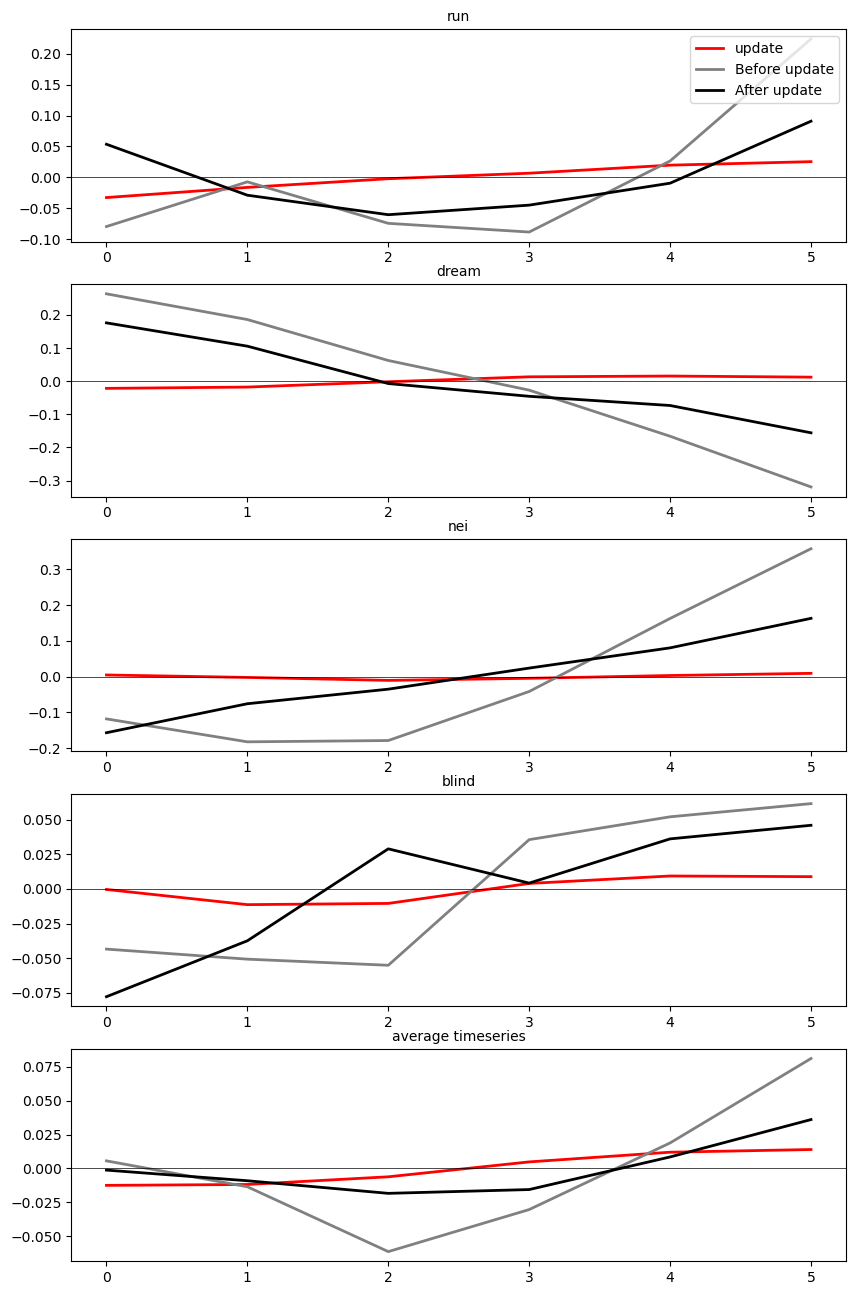

In [552]:
f,a = plt.subplots(nrows=5, ncols = 1, figsize=(10, 16))#,sharey=True)
for col, story in enumerate(['run', 'dream', 'nei', 'blind']):
    a[col].plot(update_story_mean[story], linewidth=2, color = 'red')
    a[col].plot(before_update_story_mean[story], linewidth=2, color = 'gray')
    a[col].plot(after_update_story_mean[story], linewidth=2, color = 'black')
    #a[col].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
    a[col].axhline(y=0, linewidth = 0.5, color = 'black')
    a[col].set_title(f'{story}', fontsize=10)
    a[0].legend(['update', 'Before update', 'After update'], loc = 'upper right')
    #a[0].set_ylabel(f'sub-{sub}', fontsize=12)
a[4].plot(update_mean, linewidth=2, color = 'red')
a[4].plot(before_update_mean, linewidth=2, color = 'gray')
a[4].plot(after_update_mean, linewidth=2, color = 'black')
#a[4].axvline(x=6, linewidth = 0.5, linestyle = '--', color = 'black')
a[4].axhline(y=0, linewidth = 0.5, color = 'black')
a[4].set_title('average timeseries', fontsize=10)

### offset ㅅㅣㅈㅓㅁㅇㅡㄹㅗ ㅂㅗㅏㅇㅑㅎㅏㄴㅏ?

In [289]:

#post EB vs. pre EB 
Update_timepoints = cond_timePoint['update'] 
no_update_timepoints = no_cond_timePoint['update'] 

roi = 28
update_story_mean, no_update_story_mean = {}, {}
for story in ['run', 'dream', 'nei', 'blind']:
    update_sum, no_update_sum = pd.DataFrame(), pd.DataFrame()
    for sub in subjects:
        vis, audio_data = get_story_roi(sub_story_timeseries, story, roi, sub)
        
        update_scenes, no_update_scenes  = [], []
        for idx, num in enumerate(Update_timepoints[story]):
            update_scenes.append(audio_data.iloc[num]) 
        for idx, num in enumerate(no_update_timepoints[story]):
            no_update_scenes.append(audio_data.iloc[num]) 
            
        update_sum[sub] = pd.DataFrame(update_scenes).apply(zscore).mean(axis=1)
        no_update_sum[sub] = pd.DataFrame(no_update_scenes).apply(zscore).mean(axis=1)
    update_story_mean[story] = update_sum.mean(axis = 1)
    no_update_story_mean[story] = no_update_sum.mean(axis = 1)


## C. Plotting

Text(0.5, 1.0, 'postEB timeseries')

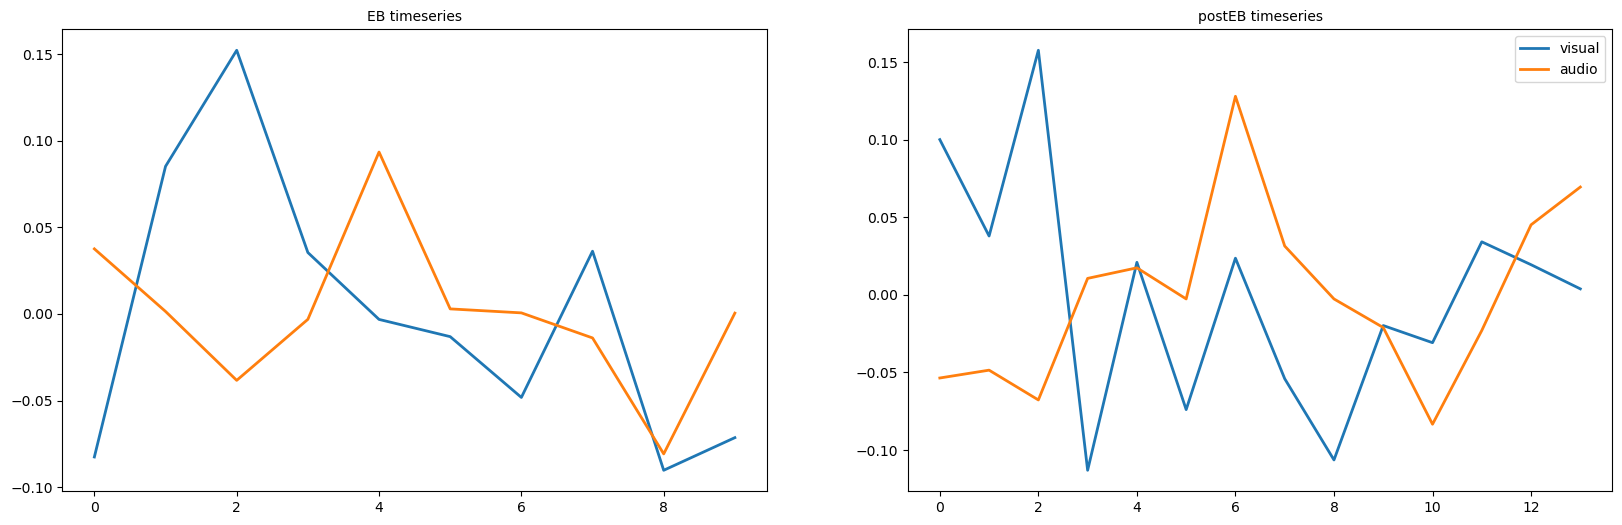

In [69]:
f,a = plt.subplots(nrows=1, ncols = 2, figsize=(20, 6))#,sharey=True)
a[0].plot(visaul_EB_mean, linewidth=2)
a[0].plot(audio_EB_mean, linewidth=2)
a[0].set_title('EB timeseries', fontsize=10)
a[1].plot(visaul_postEB_mean, linewidth=2)
a[1].plot(audio_postEB_mean, linewidth=2)
a[1].legend(['visual', 'audio'], loc = 'upper right')
a[1].set_title('postEB timeseries', fontsize=10)

# 4. Compare big update events and small events 
- Conjunctive analysis between EB and upadting score 

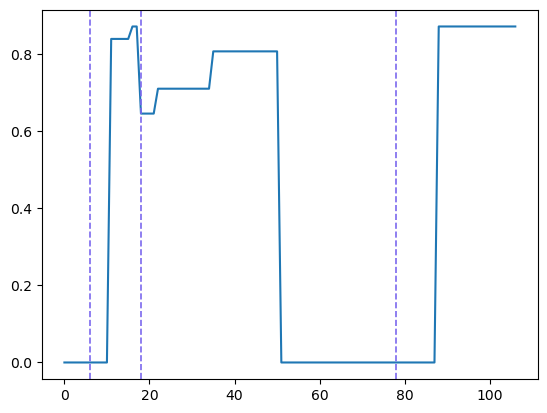

In [107]:
story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'bli':[50,58,93]}
story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'bli':[25,77,95]}


plt.plot(Alltimeseries['vis']['dream'])
for idx, line in enumerate(story_EB_visual['dream']):
    plt.axvline(x=line, ymin=0, ymax=1, linewidth = 1.2, color='mediumslateblue', linestyle='--')

# 5. Compare neural pattern 
- Ref. Chen.2017 papers 
1. For each participant, data from movie viewing and spoken recall were each divided into the same 50 scenes as defined for the behavioral analysis. 
2. BOLD data were averaged across time points within-scene, resulting in one pattern of brain activity for each scene
3. Chen did it with searchlight 

In [46]:
# Data Load & Trimming 
onset = {'set-4' :  [9, 119, 239, 359], 'set-6': [9, 129, 249, 369, 489 ], 'Dream1' : [9, 119, 239, 359], 'Dream2' : [9, 129, 239, 359], 'Dream3' : [9, 129, 249, 359], 'Dream4' : [9, 129, 249, 369]}
offset = {'set-4' : [116, 236, 356, 476], 'set-6': [126, 246, 366, 486, 606], 'Dream1' : [116, 236, 356, 476], 'Dream2' : [126, 236, 356, 476], 'Dream3' : [126, 246, 356, 476], 'Dream4' : [126, 246, 366, 476]} 
# May는 Dream의 위치에 따라 Trimming이 달라져야함.. ;D

roi_story_timeseries = {} 
for r in [5,19,28,32]:
    roi = 'roi'+str(r)
    sub_story_timeseries = {}
    for sub in subjects:
        story = {} 
        sequence = np.where(all_story[sub]=='Dream')[0][0]
        #print(sequence)
        cond = 'Dream'+str(int(sequence)+1)
        #print(cond)
        denoised_dir = os.path.join(May_dir, 'denoised', 'denoised_2023')
        if sub < 10:
            data = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-0{sub}_task-encoding_run-1_denoised_{roi}.csv'))   
            data2 = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-0{sub}_task-encoding_run-2_denoised_{roi}.csv')) 
        else: 
            data = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-{sub}_task-encoding_run-1_denoised_{roi}.csv'))   
            data2 = pd.read_csv(os.path.join(denoised_dir,'ROIs', f'sub-{sub}_task-encoding_run-2_denoised_{roi}.csv'))

        for i in np.arange(0,4):
            storyName = ['run', 'blind', 'dream', 'nei']
            story[storyName[i]] = {'visual' : data[onset[cond][i]:offset[cond][i]], 'audio' : data2[onset[cond][i]:offset[cond][i]]}
        sub_story_timeseries[sub] = story
    roi_story_timeseries[r]=sub_story_timeseries

In [9]:
# Scene segmentation - Based on EB
story_EB_visual = {'run':[18,38,48,88], 'dream':[6,18,78], 'nei':[64,85], 'blind':[50,58,93]}
story_EB_audio = {'run':[16, 48,68,88,108], 'dream':[8,18,78], 'nei':[12,32,44,62,84], 'blind':[25,77,95]}

In [ ]:
# get avg neural pattern across timeline for each scene 


In [ ]:
# compare patterns  within subjects 

In [ ]:
# Compare patterns across subjects 

In [ ]:
# Compare HPC activation beteween EB and post EB - ERP analysis